In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("train.csv")
testbabatest = pd.read_csv("test.csv")
example = pd.read_csv("gender_submission.csv")

# VERİYE GENEL BAKIŞ

Variable	Definition	Key

survival	Survival	0 = No, 1 = Yes

pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd

sex	Sex	

Age	Age in years	

KarEs:değişkeninin değeri 0 olan yolcular, yalnız seyahat eden yolculardır. Değişkenin değeri 1 olan yolcular, eşi veya kardeşi ile seyahat eden yolculardır. Değişkenin değeri 2 olan yolcular ise, eşi ve en az bir kardeşi ile seyahat eden yolculardır. Değişkenin değeri 3 ve daha büyük olan yolcular ise, genellikle büyük bir aile grubu ile seyahat eden yolculardır.

EbCo:Titanic'e ebeveynleri veya çocukları ile birlikte seyahat eden yolculardır. Değişkenin değeri 0 olan yolcular ise yalnız seyahat eden yolculardır. Değişkenin değeri negatif olan yolcuların gemiye nasıl kaydedildiği belirsizdir.

ticket	Ticket number	

fare	Passenger fare	 (bilet ücreti)

cabin	Cabin number	

embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton (bindikleri limanın adı)

In [3]:
data.rename(columns=({"SibSp":"KarEs","Parch":"EbCo","Fare":"BiletUcreti"}), inplace=True)
testbabatest.rename(columns=({"SibSp":"KarEs","Parch":"EbCo","Fare":"BiletUcreti"}), inplace=True)

In [4]:
data.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,KarEs,EbCo,Ticket,BiletUcreti,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
KarEs            0
EbCo             0
Ticket           0
BiletUcreti      0
Cabin          687
Embarked         2
dtype: int64

In [6]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,KarEs,EbCo,Ticket,BiletUcreti,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<AxesSubplot: >

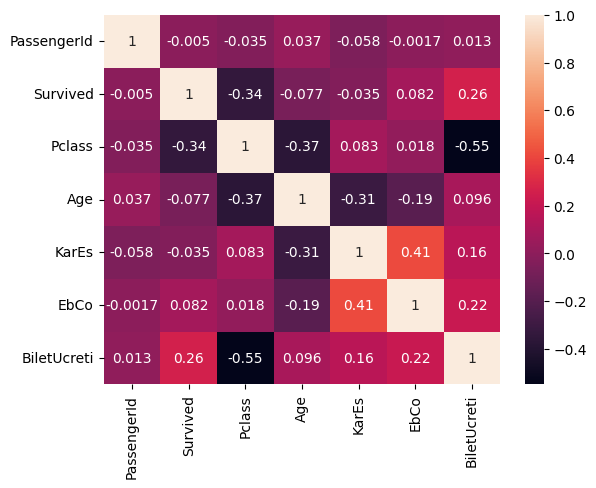

In [7]:
sns.heatmap(data.corr(numeric_only=True), annot=True)

## TİCKET HARFLERİNE GÖRE KORELASYON ARAMACA

Ticket'ta harf bulunup bulunmamasının herhangi bir şekilde bağlantısını arıyorum

In [8]:
data["Ticket"].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

In [9]:
data.loc[data["Ticket"] == "110413"] #ailelerin numaları aynı

,PassengerId,Survived,Pclass,Name,Sex,Age,KarEs,EbCo,Ticket,BiletUcreti,Cabin,Embarked
262,263,0,1,"Taussig, Mr. Emil",male,52.0,1,1,110413,79.65,E67,S
558,559,1,1,"Taussig, Mrs. Emil (Tillie Mandelbaum)",female,39.0,1,1,110413,79.65,E67,S
585,586,1,1,"Taussig, Miss. Ruth",female,18.0,0,2,110413,79.65,E68,S


In [10]:
data.loc[data["Pclass"] == 1]["Ticket"].value_counts()

17421       4
19950       4
113760      4
PC 17757    4
113781      4
           ..
113043      1
19988       1
PC 17612    1
113056      1
111369      1
Name: Ticket, Length: 147, dtype: int64

In [11]:
data.loc[data["Pclass"] == 2]["Ticket"].value_counts()

S.O.C. 14879    5
230080          3
F.C.C. 13529    3
239853          3
248727          3
               ..
C.A. 17248      1
W./C. 14263     1
SCO/W 1585      1
28665           1
211536          1
Name: Ticket, Length: 140, dtype: int64

In [12]:
data.loc[data["Pclass"] == 3]["Ticket"].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
347088      6
           ..
349233      1
349236      1
370373      1
349206      1
370376      1
Name: Ticket, Length: 394, dtype: int64

In [13]:
data.loc[data["Ticket"].str.contains("A|B|C|D|E|F|G|H|I|J|K|L|M|N|O|P|Q|R|S|T|U|V|W|X|Y|Z")]["Pclass"].value_counts()

3    109
1     64
2     57
Name: Pclass, dtype: int64

In [14]:
data.loc[~data["Ticket"].str.contains("A|B|C|D|E|F|G|H|I|J|K|L|M|N|O|P|Q|R|S|T|U|V|W|X|Y|Z")]["Pclass"].value_counts()

3    382
1    152
2    127
Name: Pclass, dtype: int64

In [15]:
data.loc[data["Ticket"].str.contains("A|B|C|D|E|F|G|H|I|J|K|L|M|N|O|P|Q|R|S|T|U|V|W|X|Y|Z")]["BiletUcreti"].value_counts()

8.0500     23
10.5000    19
7.9250     14
7.2500      9
69.5500     7
           ..
13.0000     1
7.1417      1
12.0000     1
7.7333      1
50.4958     1
Name: BiletUcreti, Length: 84, dtype: int64

In [16]:
data.loc[~data["Ticket"].str.contains("A|B|C|D|E|F|G|H|I|J|K|L|M|N|O|P|Q|R|S|T|U|V|W|X|Y|Z")]["BiletUcreti"].value_counts()

13.0000    41
7.8958     38
7.7500     34
26.0000    29
8.0500     20
           ..
81.8583     1
8.1125      1
8.6542      1
7.8750      1
10.5167     1
Name: BiletUcreti, Length: 184, dtype: int64

In [17]:
data.loc[data["Ticket"].str.contains("A|B|C|D|E|F|G|H|I|J|K|L|M|N|O|P|Q|R|S|T|U|V|W|X|Y|Z")]["Embarked"].value_counts()

S    168
C     61
Q      1
Name: Embarked, dtype: int64

In [18]:
data.loc[~data["Ticket"].str.contains("A|B|C|D|E|F|G|H|I|J|K|L|M|N|O|P|Q|R|S|T|U|V|W|X|Y|Z")]["Embarked"].value_counts()

S    476
C    107
Q     76
Name: Embarked, dtype: int64

In [19]:
data["harfli"] = 0
data.loc[data["Ticket"].str.contains("A|B|C|D|E|F|G|H|I|J|K|L|M|N|O|P|Q|R|S|T|U|V|W|X|Y|Z"), "harfli"] = 1

In [20]:
data.loc[~data["Ticket"].str.contains("A|B|C|D|E|F|G|H|I|J|K|L|M|N|O|P|Q|R|S|T|U|V|W|X|Y|Z"), "harfli"] = 0

In [21]:
data = data.copy()
testbabatest = testbabatest.copy()

In [22]:
one_hot_encoded = pd.get_dummies(data["Embarked"])
data = pd.concat([data, one_hot_encoded], axis=1)

one_hot_encoded = pd.get_dummies(testbabatest["Embarked"])
testbabatest = pd.concat([testbabatest, one_hot_encoded], axis=1)

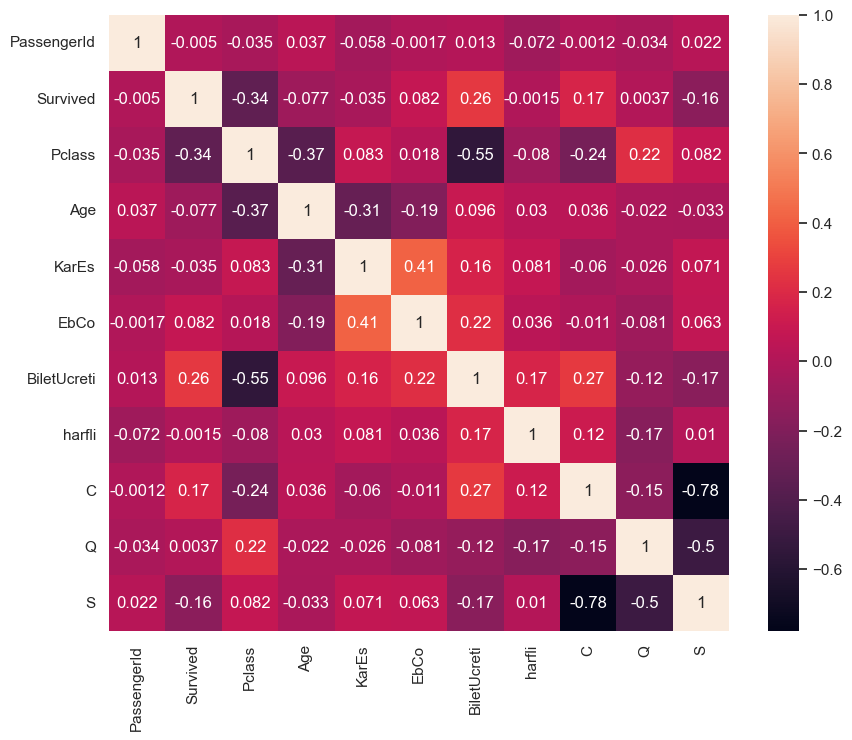

In [23]:
sns.set(rc={"figure.figsize":(10,8)})
sns.heatmap(data.corr(numeric_only=True), annot=True)
plt.show()

herhangi bir korelasyon yakayalamadım. görünüşe göre bilette harf olması tamamen rastgele.

## İSİM VE TİCKET HATALARINI TESPİT ETMECE

Ufak da olsa isimlerde ve ticketlerda hatalar olabilir. Örneğin basit bir harf ya da rakam hatası olabilir. Bunları tespit etmeye çalışacağım.

In [24]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'KarEs',
       'EbCo', 'Ticket', 'BiletUcreti', 'Cabin', 'Embarked', 'harfli', 'C',
       'Q', 'S'],
      dtype='object')

In [25]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,KarEs,EbCo,Ticket,BiletUcreti,Cabin,Embarked,harfli,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,1,0,0


In [26]:
import jellyfish
# Benzerlik eşiği
threshold = 0.9

# Tüm isimler için benzerlik değerlerini hesapla
for i, name1 in enumerate(data['Name']):
    for j, name2 in enumerate(data['Name']):
        if i < j:
            distance = jellyfish.jaro_distance(name1, name2)
            if distance > threshold:
                print(f"Potansiyel hata: {name1} - {name2} : {distance}")

Potansiyel hata: Bonnell, Miss. Elizabeth - Dowdell, Miss. Elizabeth : 0.9166666666666666
Potansiyel hata: Williams, Mr. Charles Eugene - Williams, Mr. Charles Duane : 0.9262610229276896
Potansiyel hata: Bing, Mr. Lee - Ling, Mr. Lee : 0.9487179487179488
Potansiyel hata: Jussila, Miss. Katriina - Jussila, Miss. Mari Aina : 0.9293478260869565
Potansiyel hata: Johanson, Mr. Jakob Alfred - Johnson, Mr. Alfred : 0.9102564102564102
Potansiyel hata: Youseff, Mr. Gerious - Yousseff, Mr. Gerious : 0.9841269841269842
Potansiyel hata: Canavan, Miss. Mary - Mangan, Miss. Mary : 0.9103313840155945
Potansiyel hata: Thayer, Mr. John Borland Jr - Thayer, Mr. John Borland : 0.9629629629629629
Potansiyel hata: O'Leary, Miss. Hanora "Norah" - Hegarty, Miss. Hanora "Nora" : 0.9183087027914615


In [27]:
import re

# Bilet numarası düzenli ifadesi
ticket_regex = r'^[A-Z][A-Z]?[0-9]{1,6}$'

# Bilet numaralarını kontrol et
for ticket in data['Ticket']:
    if not re.match(ticket_regex, ticket):
        print(f"Hatalı bilet numarası: {ticket}")


Hatalı bilet numarası: A/5 21171
Hatalı bilet numarası: PC 17599
Hatalı bilet numarası: STON/O2. 3101282
Hatalı bilet numarası: 113803
Hatalı bilet numarası: 373450
Hatalı bilet numarası: 330877
Hatalı bilet numarası: 17463
Hatalı bilet numarası: 349909
Hatalı bilet numarası: 347742
Hatalı bilet numarası: 237736
Hatalı bilet numarası: PP 9549
Hatalı bilet numarası: 113783
Hatalı bilet numarası: A/5. 2151
Hatalı bilet numarası: 347082
Hatalı bilet numarası: 350406
Hatalı bilet numarası: 248706
Hatalı bilet numarası: 382652
Hatalı bilet numarası: 244373
Hatalı bilet numarası: 345763
Hatalı bilet numarası: 2649
Hatalı bilet numarası: 239865
Hatalı bilet numarası: 248698
Hatalı bilet numarası: 330923
Hatalı bilet numarası: 113788
Hatalı bilet numarası: 349909
Hatalı bilet numarası: 347077
Hatalı bilet numarası: 2631
Hatalı bilet numarası: 19950
Hatalı bilet numarası: 330959
Hatalı bilet numarası: 349216
Hatalı bilet numarası: PC 17601
Hatalı bilet numarası: PC 17569
Hatalı bilet numarası: 

görünüşe bakılırsa biletlerde hata olabilir. biletlere atarak bir model kuralım, sonrasında biletlerle tekrar deneyelim. duruma göre belki biletlere çözüm üretiriz.

# NAN DOLDURMACA

In [28]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
KarEs            0
EbCo             0
Ticket           0
BiletUcreti      0
Cabin          687
Embarked         2
harfli           0
C                0
Q                0
S                0
dtype: int64

In [29]:
data["Cabin"] #900 girdiden sadece yaklaşık 250'sinin kabinini biliyoruz, kurtarılamayacak seviyede olduğunu düşündüğüm için bulmaya uğrşamayacağım belki en son bakarım

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [30]:
data["Embarked"] #basit istatistiksel metodlarla 2 datayı bulabiliriz, ya da model kurarız, verilere bir bakalım

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [31]:
data.loc[data["Embarked"].isna()==True]

,PassengerId,Survived,Pclass,Name,Sex,Age,KarEs,EbCo,Ticket,BiletUcreti,Cabin,Embarked,harfli,C,Q,S
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,0,0,0,0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,0,0,0,0


In [32]:
data.loc[data["Ticket"]=="113572"]

,PassengerId,Survived,Pclass,Name,Sex,Age,KarEs,EbCo,Ticket,BiletUcreti,Cabin,Embarked,harfli,C,Q,S
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,0,0,0,0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,0,0,0,0


In [33]:
data.loc[data["Name"].str.contains("Icard|Stone|Martha|Evelyn|Nelson|Amelie")]

,PassengerId,Survived,Pclass,Name,Sex,Age,KarEs,EbCo,Ticket,BiletUcreti,Cabin,Embarked,harfli,C,Q,S
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0000,B28,NaN,0,0,0,0
166,167,1,1,"Chibnall, Mrs. (Edith Martha Bowerman)",female,NaN,0,1,113505,55.0000,E33,S,0,0,0,1
319,320,1,1,"Spedden, Mrs. Frederic Oakley (Margaretta Corn...",female,40.0,1,1,16966,134.5000,E34,C,0,1,0,0
591,592,1,1,"Stephenson, Mrs. Walter Bertram (Martha Eustis)",female,52.0,1,0,36947,78.2667,D20,C,0,1,0,0
621,622,1,1,"Kimball, Mr. Edwin Nelson Jr",male,42.0,1,0,11753,52.5542,D19,S,0,0,0,1
759,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.5000,B77,S,0,0,0,1
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0000,B28,NaN,0,0,0,0


Görünüşe göre herhangi bir alaka yok, bu NaN değerleri mod'a göre dolduracağım.

In [34]:
data.loc[data["Embarked"].isna()==True, "Embarked"] = data["Embarked"].value_counts()[0] #en çok tekrarlanan değerle değiştirdim.

In [35]:
grouped_data = data.groupby("Ticket")
for name, group in grouped_data:
    if len(group) > 1 and any(group["Age"].isna()):
        print("Ticket Numarası:", name)
        print(group[["Name","KarEs","EbCo","Age"]])
        print("-----------------------")
 # bu yöntemle aileleri listelemiş olduk, böylece ailedeki diğer fertlerin yaşlarına bakarak yaş tahmini gerçekleştireceğiz.

Ticket Numarası: 110465
                               Name  KarEs  EbCo   Age
110  Porter, Mr. Walter Chamberlain      0     0  47.0
475     Clifford, Mr. George Quincy      0     0   NaN
-----------------------
Ticket Numarası: 113505
                                       Name  KarEs  EbCo   Age
166  Chibnall, Mrs. (Edith Martha Bowerman)      0     1   NaN
356             Bowerman, Miss. Elsie Edith      0     1  22.0
-----------------------
Ticket Numarası: 113798
                        Name  KarEs  EbCo   Age
270    Cairns, Mr. Alexander      0     0   NaN
842  Serepeca, Miss. Augusta      0     0  30.0
-----------------------
Ticket Numarası: 1601
                Name  KarEs  EbCo   Age
74     Bing, Mr. Lee      0     0  32.0
169    Ling, Mr. Lee      0     0  28.0
509   Lang, Mr. Fang      0     0  26.0
643  Foo, Mr. Choong      0     0   NaN
692     Lam, Mr. Ali      0     0   NaN
826     Lam, Mr. Len      0     0   NaN
838  Chip, Mr. Chang      0     0  32.0
----------------

yaşı büyük olmalı: 166, 849,109,768

çocuk olmalı:

bir bakılmalı:Lam-Foo,Fleming-Thayer,Leitch-Harper(muhtemelen kadının yaşı büyk),Attalah-Yousseff,Zabour,Peter (aynı aile farklı biletler almış muhtemelen), Boulos(aynı aile farklı bilet),Patchett-Garfirth,Moran-Ryan,Lefebre,Sage,Frauenthal,Bidois-Robbins-Astor-Endres,Johnston

## YAŞ TAHMİNİ MODELİ

Yaş tahmini modeli için randomforest denemesi yapacağım, basit classifier olduğu için iş göreceğini düşünüyorum

In [36]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'KarEs',
       'EbCo', 'Ticket', 'BiletUcreti', 'Cabin', 'Embarked', 'harfli', 'C',
       'Q', 'S'],
      dtype='object')

In [37]:
data1 = data.copy()
data1.drop(columns="Cabin", inplace=True)

In [38]:
data2 = testbabatest.copy()
data2.drop(columns="Cabin", inplace=True)

In [39]:
data1

,PassengerId,Survived,Pclass,Name,Sex,Age,KarEs,EbCo,Ticket,BiletUcreti,Embarked,harfli,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,0,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,0,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S,1,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,0,1,0,0


In [40]:
data2

,PassengerId,Pclass,Name,Sex,Age,KarEs,EbCo,Ticket,BiletUcreti,Embarked,C,Q,S
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S,0,0,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,1,0,0
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,0,0,1
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S,0,0,1


In [41]:
data1.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
KarEs            0
EbCo             0
Ticket           0
BiletUcreti      0
Embarked         0
harfli           0
C                0
Q                0
S                0
dtype: int64

### Regresyon Modelleri

In [42]:
one_hot_encoded = pd.get_dummies(data1["Sex"])
data1 = pd.concat([data1, one_hot_encoded], axis=1)
data1.drop(columns=["Sex","Embarked","Name"], inplace=True)

one_hot_encoded = pd.get_dummies(data2["Sex"])
data2 = pd.concat([data2, one_hot_encoded], axis=1)
data2.drop(columns=["Sex","Embarked","Name"], inplace=True)

In [43]:
one_hot_encoded = pd.get_dummies(data1["Ticket"])
data1 = pd.concat([data1, one_hot_encoded], axis=1)
data1.drop(columns=["Ticket"], inplace=True)

one_hot_encoded = pd.get_dummies(data2["Ticket"])
data2 = pd.concat([data2, one_hot_encoded], axis=1)
data2.drop(columns=["Ticket"], inplace=True)

In [44]:
train = data1[pd.notnull(data1['Age'])].copy()
test = data1[pd.isna(data1['Age'])].copy()

In [45]:
#from sklearn.preprocessing import LabelEncoder
#label_encoder = LabelEncoder()
#train["Ticket"] = label_encoder.fit_transform(train["Ticket"])

In [46]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X = train.drop(['Age', "PassengerId"], axis=1)
y = train['Age']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3169)

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=3169)

rf_regressor.fit(X_train, y_train)

y_pred = rf_regressor.predict(X_test)

r2_RandomForestRegressor = r2_score(y_test, y_pred)

In [47]:
from sklearn.ensemble import GradientBoostingRegressor

# Bağımlı ve bağımsız değişkenleri seç
X = train.drop(['Age', "PassengerId"], axis=1)
y = train['Age']

# Veri kümesini eğitim ve test setlerine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3169)

# Gradient boosting regresyon modeli oluştur
gb_regressor = GradientBoostingRegressor(n_estimators=100, random_state=3169)

# Modeli eğit
gb_regressor.fit(X_train, y_train)

# Test seti için tahmin yap
y_pred = gb_regressor.predict(X_test)

# R^2 skoru hesapla
r2_gradient_boosting = r2_score(y_test, y_pred)

In [48]:
import xgboost as xgb

# Bağımlı ve bağımsız değişkenleri seç
X = train.drop(['Age', "PassengerId"], axis=1)
y = train['Age']
# Veri kümesini eğitim ve test setlerine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3169)

# XGBoost regresyon modeli oluştur
xgb_regressor = xgb.XGBRegressor(objective ='reg:squarederror', n_estimators = 100, seed = 3169)

# Modeli eğit
xgb_regressor.fit(X_train, y_train)

# Test seti için tahmin yap
y_pred = xgb_regressor.predict(X_test)

# R^2 skoru hesapla
r2_xgboost = r2_score(y_test, y_pred)

In [49]:
from sklearn.svm import SVR

# Bağımlı ve bağımsız değişkenleri seç
X = train.drop(['Age', "PassengerId"], axis=1)
y = train['Age']

# Veri kümesini eğitim ve test setlerine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3169)

# SVR modeli oluştur
svr_regressor = SVR(kernel='linear', C=1e3)

# Modeli eğit
svr_regressor.fit(X_train, y_train)

# Test seti için tahmin yap
y_pred = svr_regressor.predict(X_test)

# R^2 skoru hesapla
r2_svr = r2_score(y_test, y_pred)

In [50]:
from sklearn.linear_model import Ridge

# Bağımlı ve bağımsız değişkenleri seç
X = train.drop(['Age', "PassengerId"], axis=1)
y = train['Age']

# Veri kümesini eğitim ve test setlerine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3169)

# Ridge regresyon modeli oluştur
ridge_regressor = Ridge(alpha=1.0)

# Modeli eğit
ridge_regressor.fit(X_train, y_train)

# Test seti için tahmin yap
y_pred = ridge_regressor.predict(X_test)

# R^2 skoru hesapla
r2_ridge = r2_score(y_test, y_pred)

In [51]:
from sklearn.linear_model import Lasso

# Bağımlı ve bağımsız değişkenleri seç
X = train.drop(['Age', "PassengerId"], axis=1)
y = train['Age']

# Veri kümesini eğitim ve test setlerine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3169)

# Lasso regresyon modeli oluştur
lasso_regressor = Lasso(alpha=1.0)

# Modeli eğit
lasso_regressor.fit(X_train, y_train)

# Test seti için tahmin yap
y_pred = lasso_regressor.predict(X_test)

# R^2 skoru hesapla
r2_lasso = r2_score(y_test, y_pred)

In [52]:
from sklearn.neighbors import KNeighborsRegressor

# Bağımlı ve bağımsız değişkenleri seç
X = train.drop(['Age', "PassengerId"], axis=1)
y = train['Age']

# Veri kümesini eğitim ve test setlerine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3169)

# K-NN regresyon modeli oluştur
knn_regressor = KNeighborsRegressor(n_neighbors=5)

# Modeli eğit
knn_regressor.fit(X_train, y_train)

# Test seti için tahmin yap
y_pred = knn_regressor.predict(X_test)

# R^2 skoru hesapla
r2_knn = r2_score(y_test, y_pred)

In [53]:
print("R^2 Skoru RandomForest: {:.2f}".format(r2_RandomForestRegressor))
print("R^2 Skoru Gradient Boosting: {:.2f}".format(r2_gradient_boosting))
print("R^2 Skoru XGBoost: {:.2f}".format(r2_xgboost))
print("R^2 Skoru SVR: {:.2f}".format(r2_svr))
print("R^2 Skoru Ridge: {:.2f}".format(r2_ridge))
print("R^2 Skoru Lasso: {:.2f}".format(r2_lasso))
print("R^2 Skoru K-NN: {:.2f}".format(r2_knn))

R^2 Skoru RandomForest: 0.39
R^2 Skoru Gradient Boosting: 0.43
R^2 Skoru XGBoost: 0.40
R^2 Skoru SVR: -0.10
R^2 Skoru Ridge: 0.22
R^2 Skoru Lasso: 0.29
R^2 Skoru K-NN: 0.23


In [54]:
anan = test.drop(['Age', 'PassengerId'], axis=1)
y_pred_GB = gb_regressor.predict(anan)
y_pred_XGB = xgb_regressor.predict(anan)
dataGB = data.copy()
dataXGB = data.copy()
dataGB.loc[pd.isna(dataGB['Age']), "Age"] = y_pred_GB
dataXGB.loc[pd.isna(dataXGB['Age']), "Age"] = y_pred_XGB

dataGB, GB yöntemiyle tahmin edilen

dataXGB ise XGB yöntemiyle tahmin edilen veri seti. ikisinin de testlerdei başarı oranı %40'dı.

### İstatistiksel Yöntemler

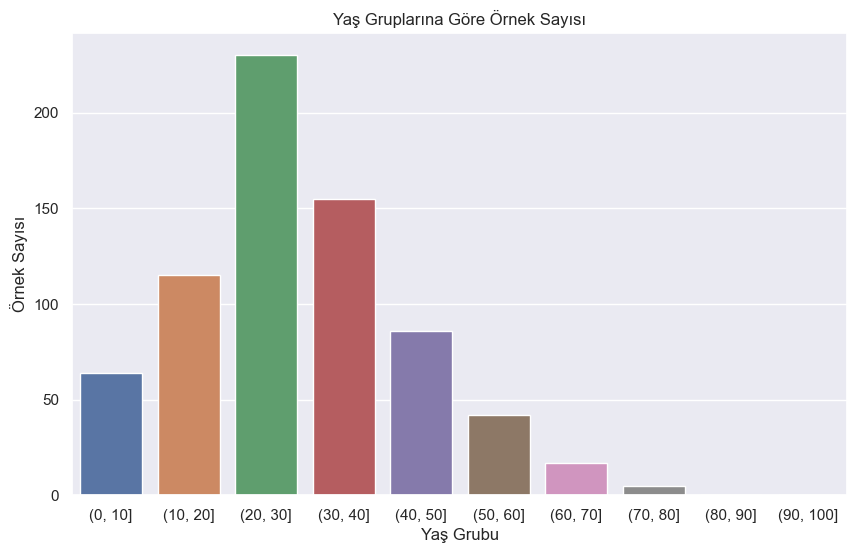

(0, 10]: 64
(10, 20]: 115
(20, 30]: 230
(30, 40]: 155
(40, 50]: 86
(50, 60]: 42
(60, 70]: 17
(70, 80]: 5
(80, 90]: 0
(90, 100]: 0


In [55]:
dataC = data.copy()
age_groups = pd.cut(dataC['Age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
age_group_counts = age_groups.value_counts().sort_index()
plt.figure(figsize=(10,6))
sns.barplot(x=age_group_counts.index, y=age_group_counts.values)
plt.xlabel('Yaş Grubu')
plt.ylabel('Örnek Sayısı')
plt.title('Yaş Gruplarına Göre Örnek Sayısı')
plt.show()

def print_age_group_counts(age_group_counts):
    for age_group, count in age_group_counts.items():
        print(f"{age_group}: {count}")

print_age_group_counts(age_group_counts)

In [56]:
print(dataC['Age'].isnull().sum())
print(len(dataC['Age']))

177
891


In [57]:
age_by_class = dataC[['Pclass', 'Age']].groupby(['Pclass']).mean()
print(age_by_class)

              Age
Pclass           
1       38.233441
2       29.877630
3       25.140620


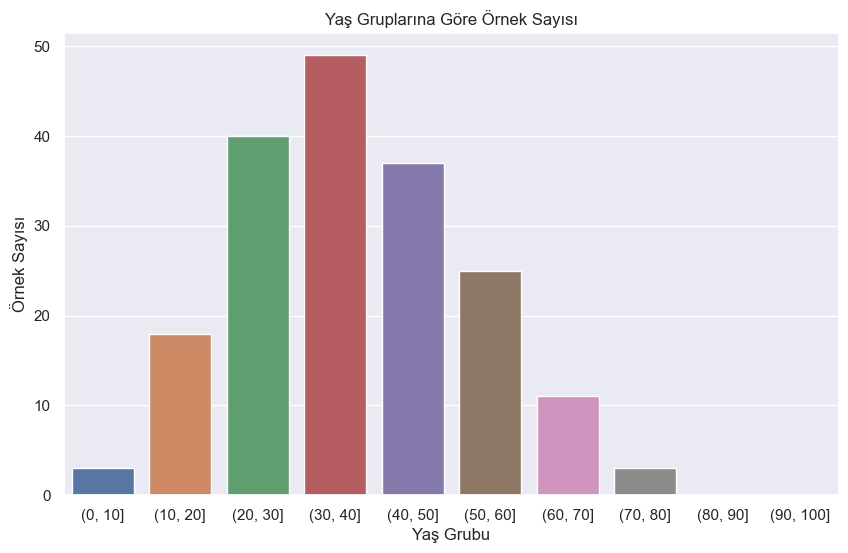

(0, 10]: 3
(10, 20]: 18
(20, 30]: 40
(30, 40]: 49
(40, 50]: 37
(50, 60]: 25
(60, 70]: 11
(70, 80]: 3
(80, 90]: 0
(90, 100]: 0


In [58]:
age_groups = pd.cut(dataC.loc[dataC["Pclass"] == 1,'Age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
age_group_counts = age_groups.value_counts().sort_index()
plt.figure(figsize=(10,6))
sns.barplot(x=age_group_counts.index, y=age_group_counts.values)
plt.xlabel('Yaş Grubu')
plt.ylabel('Örnek Sayısı')
plt.title('Yaş Gruplarına Göre Örnek Sayısı')
plt.show()

def print_age_group_counts(age_group_counts):
    for age_group, count in age_group_counts.items():
        print(f"{age_group}: {count}")

print_age_group_counts(age_group_counts)

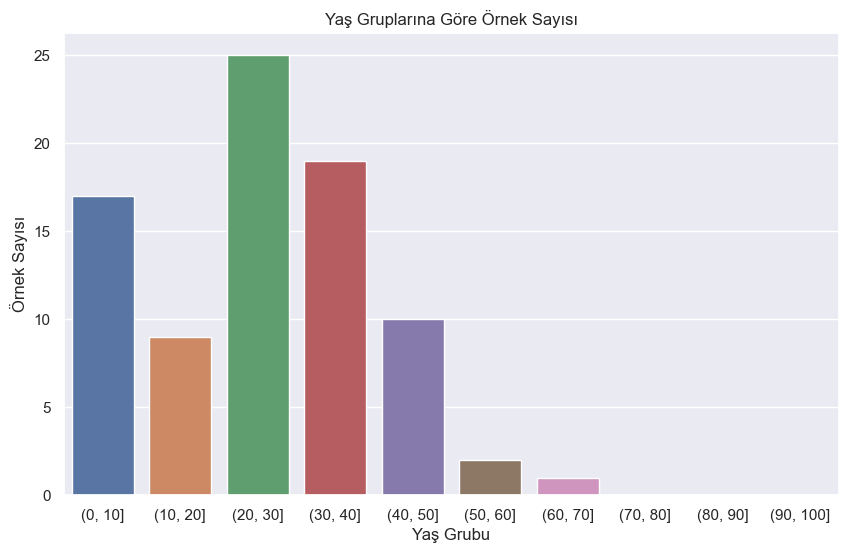

(0, 10]: 17
(10, 20]: 9
(20, 30]: 25
(30, 40]: 19
(40, 50]: 10
(50, 60]: 2
(60, 70]: 1
(70, 80]: 0
(80, 90]: 0
(90, 100]: 0


In [59]:
age_groups = pd.cut(dataC.loc[(dataC["Pclass"] == 2) & (dataC["Survived"] == 1),'Age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
age_group_counts = age_groups.value_counts().sort_index()
plt.figure(figsize=(10,6))
sns.barplot(x=age_group_counts.index, y=age_group_counts.values)
plt.xlabel('Yaş Grubu')
plt.ylabel('Örnek Sayısı')
plt.title('Yaş Gruplarına Göre Örnek Sayısı')
plt.show()

def print_age_group_counts(age_group_counts):
    for age_group, count in age_group_counts.items():
        print(f"{age_group}: {count}")

print_age_group_counts(age_group_counts)

In [60]:
dataC.loc[(dataC["Pclass"] == 1) & (dataC["Survived"] == 1) & (dataC["Age"].isna()), "Age"] = dataC.loc[(dataC["Pclass"] == 1) & (dataC["Survived"] == 1) & (dataC["Age"].notna()), :]["Age"].mean()
dataC.loc[(dataC["Pclass"] == 2) & (dataC["Survived"] == 1) & (dataC["Age"].isna()), "Age"] = dataC.loc[(dataC["Pclass"] == 2) & (dataC["Survived"] == 1) & (dataC["Age"].notna()), :]["Age"].mean()
dataC.loc[(dataC["Pclass"] == 3) & (dataC["Survived"] == 1) & (dataC["Age"].isna()), "Age"] = dataC.loc[(dataC["Pclass"] == 3) & (dataC["Survived"] == 1) & (dataC["Age"].notna()), :]["Age"].mean()
dataC.loc[(dataC["Pclass"] == 1) & (dataC["Survived"] == 0) & (dataC["Age"].isna()), "Age"] = dataC.loc[(dataC["Pclass"] == 1) & (dataC["Survived"] == 0) & (dataC["Age"].notna()), :]["Age"].mean()
dataC.loc[(dataC["Pclass"] == 2) & (dataC["Survived"] == 0) & (dataC["Age"].isna()), "Age"] = dataC.loc[(dataC["Pclass"] == 2) & (dataC["Survived"] == 0) & (dataC["Age"].notna()), :]["Age"].mean()
dataC.loc[(dataC["Pclass"] == 3) & (dataC["Survived"] == 0) & (dataC["Age"].isna()), "Age"] = dataC.loc[(dataC["Pclass"] == 3) & (dataC["Survived"] == 0) & (dataC["Age"].notna()), :]["Age"].mean()

In [61]:
dataSTATS = dataC.copy()

Yolcuları classına ve kurtulma durumlarına göre sınıflayarak yaşlarını çıkarttım ve bunların ortalamalarını ekledim, bu veri setimin adı dataSTATS.

In [62]:
dataSTATS.loc[data.loc[data["Age"].isna() == True].index]

,PassengerId,Survived,Pclass,Name,Sex,Age,KarEs,EbCo,Ticket,BiletUcreti,Cabin,Embarked,harfli,C,Q,S
5,6,0,3,"Moran, Mr. James",male,26.555556,0,0,330877,8.4583,NaN,Q,0,0,1,0
17,18,1,2,"Williams, Mr. Charles Eugene",male,25.901566,0,0,244373,13.0000,NaN,S,0,0,0,1
19,20,1,3,"Masselmani, Mrs. Fatima",female,20.646118,0,0,2649,7.2250,NaN,C,0,1,0,0
26,27,0,3,"Emir, Mr. Farred Chehab",male,26.555556,0,0,2631,7.2250,NaN,C,0,1,0,0
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,20.646118,0,0,330959,7.8792,NaN,Q,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,26.555556,0,0,2629,7.2292,NaN,C,0,1,0,0
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,26.555556,8,2,CA. 2343,69.5500,NaN,S,1,0,0,1
868,869,0,3,"van Melkebeke, Mr. Philemon",male,26.555556,0,0,345777,9.5000,NaN,S,0,0,0,1
878,879,0,3,"Laleff, Mr. Kristo",male,26.555556,0,0,349217,7.8958,NaN,S,0,0,0,1


In [63]:
dataXGB.loc[data.loc[data["Age"].isna() == True].index]

,PassengerId,Survived,Pclass,Name,Sex,Age,KarEs,EbCo,Ticket,BiletUcreti,Cabin,Embarked,harfli,C,Q,S
5,6,0,3,"Moran, Mr. James",male,27.944950,0,0,330877,8.4583,NaN,Q,0,0,1,0
17,18,1,2,"Williams, Mr. Charles Eugene",male,30.589169,0,0,244373,13.0000,NaN,S,0,0,0,1
19,20,1,3,"Masselmani, Mrs. Fatima",female,19.921864,0,0,2649,7.2250,NaN,C,0,1,0,0
26,27,0,3,"Emir, Mr. Farred Chehab",male,27.842373,0,0,2631,7.2250,NaN,C,0,1,0,0
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,19.551359,0,0,330959,7.8792,NaN,Q,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,27.401112,0,0,2629,7.2292,NaN,C,0,1,0,0
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,11.568846,8,2,CA. 2343,69.5500,NaN,S,1,0,0,1
868,869,0,3,"van Melkebeke, Mr. Philemon",male,26.575327,0,0,345777,9.5000,NaN,S,0,0,0,1
878,879,0,3,"Laleff, Mr. Kristo",male,26.575327,0,0,349217,7.8958,NaN,S,0,0,0,1


In [64]:
dataGB.loc[data.loc[data["Age"].isna() == True].index]

,PassengerId,Survived,Pclass,Name,Sex,Age,KarEs,EbCo,Ticket,BiletUcreti,Cabin,Embarked,harfli,C,Q,S
5,6,0,3,"Moran, Mr. James",male,28.242439,0,0,330877,8.4583,NaN,Q,0,0,1,0
17,18,1,2,"Williams, Mr. Charles Eugene",male,29.439741,0,0,244373,13.0000,NaN,S,0,0,0,1
19,20,1,3,"Masselmani, Mrs. Fatima",female,24.276794,0,0,2649,7.2250,NaN,C,0,1,0,0
26,27,0,3,"Emir, Mr. Farred Chehab",male,27.464178,0,0,2631,7.2250,NaN,C,0,1,0,0
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,25.055055,0,0,330959,7.8792,NaN,Q,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,27.464178,0,0,2629,7.2292,NaN,C,0,1,0,0
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,11.654006,8,2,CA. 2343,69.5500,NaN,S,1,0,0,1
868,869,0,3,"van Melkebeke, Mr. Philemon",male,28.242439,0,0,345777,9.5000,NaN,S,0,0,0,1
878,879,0,3,"Laleff, Mr. Kristo",male,28.242439,0,0,349217,7.8958,NaN,S,0,0,0,1


## ARA FİKİRLER

Yaş tahmini modellerinde aykırı değerler atılabilirdi, ayrıca sadece survived ve pclass paramterleri ile tahmin yapılıp bakılabilirdi

İstatistiksel metodla doldurma yaparken de aykırı değerler atılabilirdi

Özellikle sistem açıkça gösteriyor ki kurtulma durumlarında yaş düşüyor ve class yükseldikçe de yaşlar düşüyor, burada aykırı değer elemeleri aslında iyi olurdu fakat üşendiğim için bakmadım. Bu üç tiple modeli analiz edeceğim ve sonrasında, eğer üşenmezsem, aykırı değer eleme ile yaşları yeniden tahmin ederek belki tekrardan model kurarım.

Ek olarak incelenecek diyerek baktığım fakat incelemediğim yaş grupları da var, onlara da bakılabilir

# MODEL İÇİN DATALANDIRMALAR

## ekstra data

yaşlara göre sınıflandırma ekleyeceğim

In [65]:
# Yaş gruplarını belirle
dataSTATSage_groups = pd.cut(dataSTATS['Age'], bins=[0, 15, 18, 22, 30, 40, 55, 60, 65, 80, 100], 
                    labels=['Velet', 'Çocuk', 'Genç', 'Yetişkin', 'Olgun', 'Yaşlanmada', 
                            'Geç', 'İleri_Geç', 'Yaşlı', 'İleri_Yaşlı'])

dataXGBage_groups = pd.cut(dataXGB['Age'], bins=[0, 15, 18, 22, 30, 40, 55, 60, 65, 80, 100], 
                    labels=['Velet', 'Çocuk', 'Genç', 'Yetişkin', 'Olgun', 'Yaşlanmada', 
                            'Geç', 'İleri_Geç', 'Yaşlı', 'İleri_Yaşlı'])

dataGBage_groups = pd.cut(dataGB['Age'], bins=[0, 15, 18, 22, 30, 40, 55, 60, 65, 80, 100], 
                    labels=['Velet', 'Çocuk', 'Genç', 'Yetişkin', 'Olgun', 'Yaşlanmada', 
                            'Geç', 'İleri_Geç', 'Yaşlı', 'İleri_Yaşlı'])

# Yaş gruplarını veri kümesine ekle
dataSTATS['age_group'] = dataSTATSage_groups
dataXGB['age_group'] = dataXGBage_groups
dataGB['age_group'] = dataGBage_groups

bilet ücretlerine göre de sınflandırma yapalım

In [66]:
dataGB.loc[dataGB["Pclass"] == 1,"BiletUcreti"].mean()

84.1546875

In [67]:
dataGB.loc[dataGB["Pclass"] == 2,"BiletUcreti"].mean()

20.662183152173913

In [68]:
dataGB.loc[dataGB["Pclass"] == 3,"BiletUcreti"].mean()

13.675550101832993

In [69]:
dataGB.loc[:,"BiletUcreti"].sort_values()

271      0.0000
597      0.0000
302      0.0000
633      0.0000
277      0.0000
         ...   
438    263.0000
341    263.0000
737    512.3292
258    512.3292
679    512.3292
Name: BiletUcreti, Length: 891, dtype: float64

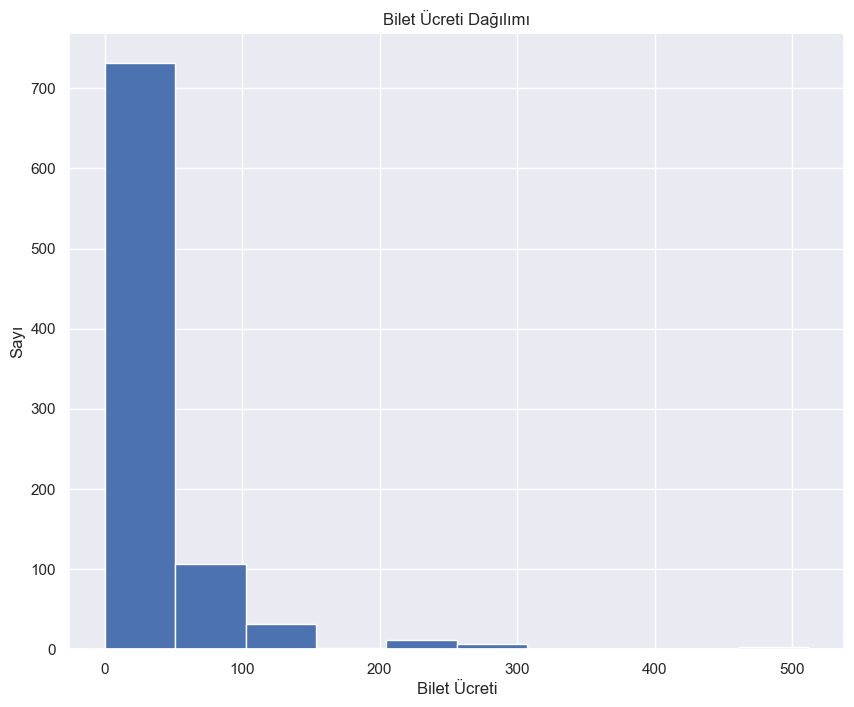

In [70]:
plt.hist(dataGB.loc[:,"BiletUcreti"].sort_values(), bins=10)
plt.xlabel('Bilet Ücreti')
plt.ylabel('Sayı')
plt.title('Bilet Ücreti Dağılımı')
plt.show()

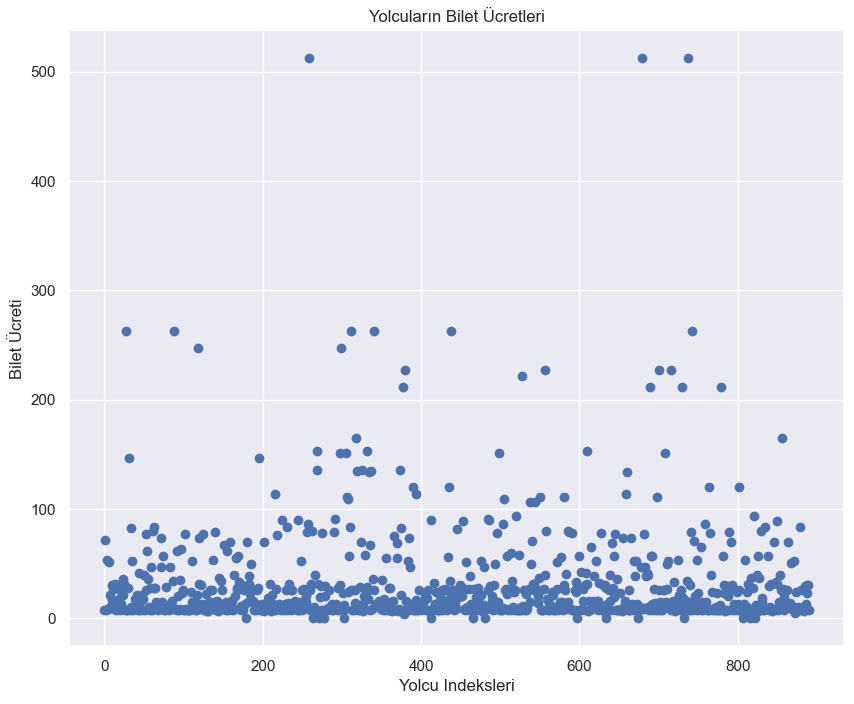

In [71]:
plt.scatter(range(len(dataGB["BiletUcreti"])), dataGB["BiletUcreti"])
plt.xlabel('Yolcu Indeksleri')
plt.ylabel('Bilet Ücreti')
plt.title('Yolcuların Bilet Ücretleri')
plt.show()

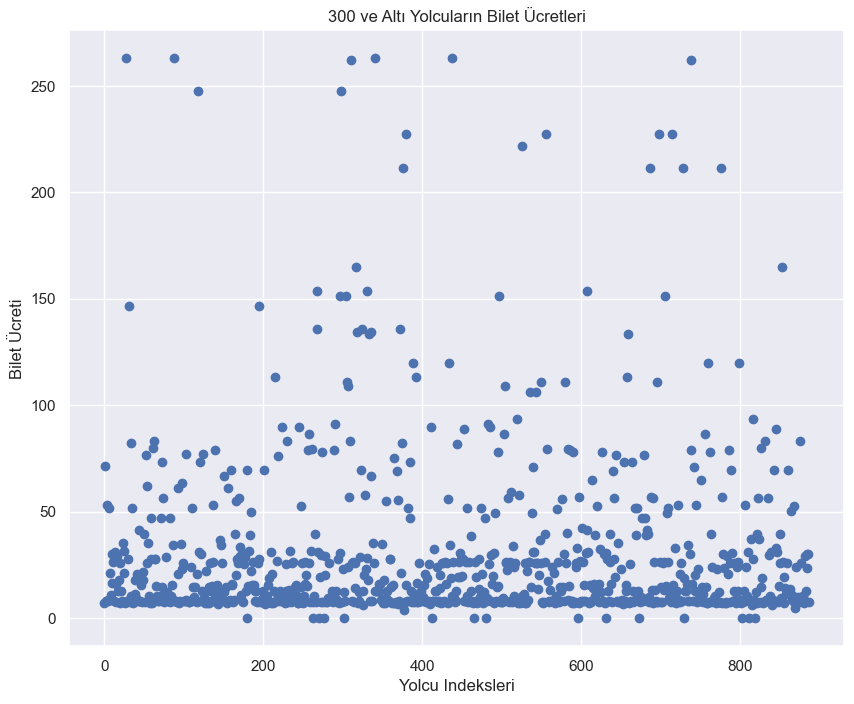

In [72]:
n=300
babba = dataGB.loc[dataGB["BiletUcreti"] <= n, "BiletUcreti"]
plt.scatter(range(len(babba)), babba)
plt.xlabel('Yolcu Indeksleri')
plt.ylabel('Bilet Ücreti')
plt.title(str(n) + ' ve Altı Yolcuların Bilet Ücretleri')
plt.show()

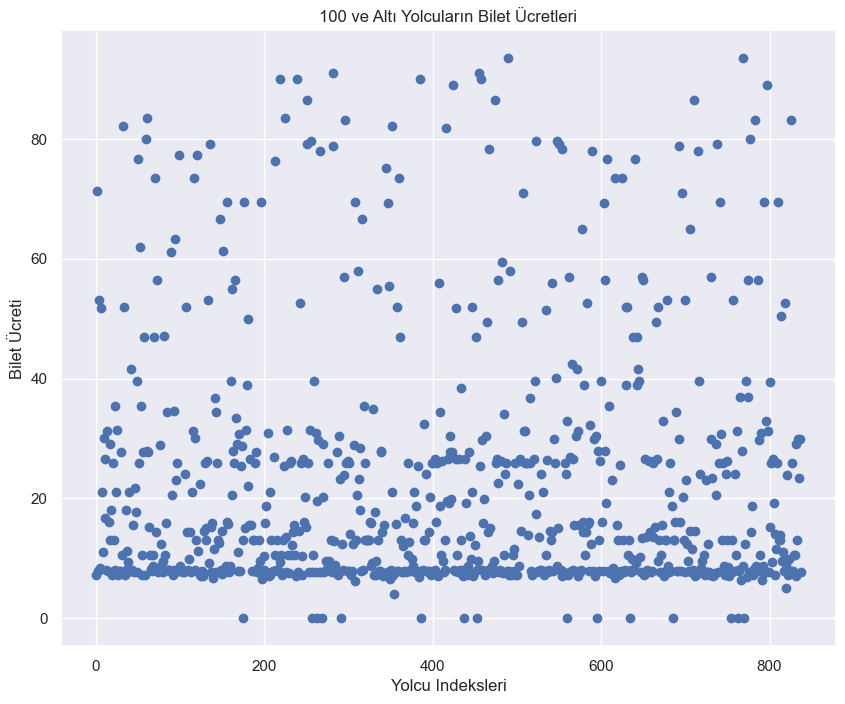

In [73]:
n=100
babba = dataGB.loc[dataGB["BiletUcreti"] <= n, "BiletUcreti"]
plt.scatter(range(len(babba)), babba)
plt.xlabel('Yolcu Indeksleri')
plt.ylabel('Bilet Ücreti')
plt.title(str(n) + ' ve Altı Yolcuların Bilet Ücretleri')
plt.show()

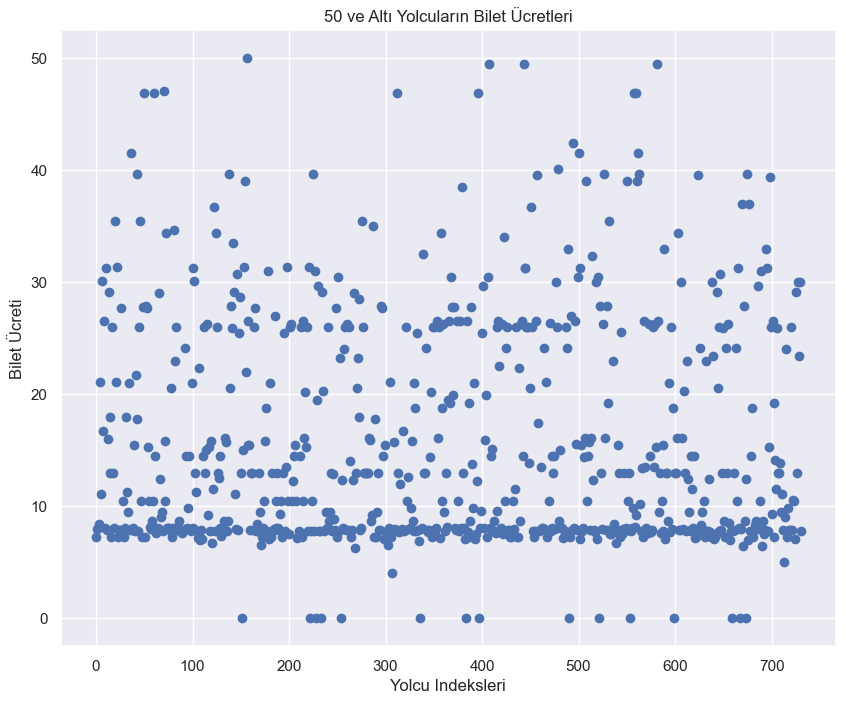

In [74]:
n=50
babba = dataGB.loc[dataGB["BiletUcreti"] <= n, "BiletUcreti"]
plt.scatter(range(len(babba)), babba)
plt.xlabel('Yolcu Indeksleri')
plt.ylabel('Bilet Ücreti')
plt.title(str(n) + ' ve Altı Yolcuların Bilet Ücretleri')
plt.show()

In [75]:
dataGB.loc[dataGB["BiletUcreti"] >= 0, "para"] = "beleş"
dataGB.loc[dataGB["BiletUcreti"] >= 4, "para"] = "garipler"
dataGB.loc[dataGB["BiletUcreti"] >= 10, "para"] = "ortadirekt"
dataGB.loc[dataGB["BiletUcreti"] >= 25, "para"] = "iyi"
dataGB.loc[dataGB["BiletUcreti"] >= 50, "para"] = "cokiyi"
dataGB.loc[dataGB["BiletUcreti"] >= 75, "para"] = "sağlam"
dataGB.loc[dataGB["BiletUcreti"] >= 100, "para"] = "varlıklı"
dataGB.loc[dataGB["BiletUcreti"] >= 150, "para"] = "paravar"
dataGB.loc[dataGB["BiletUcreti"] >= 200, "para"] = "zengin"
dataGB.loc[dataGB["BiletUcreti"] >= 300, "para"] = "rich"

dataXGB.loc[dataXGB["BiletUcreti"] >= 0, "para"] = "beleş"
dataXGB.loc[dataXGB["BiletUcreti"] >= 4, "para"] = "garipler"
dataXGB.loc[dataXGB["BiletUcreti"] >= 10, "para"] = "ortadirekt"
dataXGB.loc[dataXGB["BiletUcreti"] >= 25, "para"] = "iyi"
dataXGB.loc[dataXGB["BiletUcreti"] >= 50, "para"] = "cokiyi"
dataXGB.loc[dataXGB["BiletUcreti"] >= 75, "para"] = "sağlam"
dataXGB.loc[dataXGB["BiletUcreti"] >= 100, "para"] = "varlıklı"
dataXGB.loc[dataXGB["BiletUcreti"] >= 150, "para"] = "paravar"
dataXGB.loc[dataXGB["BiletUcreti"] >= 200, "para"] = "zengin"
dataXGB.loc[dataXGB["BiletUcreti"] >= 300, "para"] = "rich"

dataSTATS.loc[dataSTATS["BiletUcreti"] >= 0, "para"] = "beleş"
dataSTATS.loc[dataSTATS["BiletUcreti"] >= 4, "para"] = "garipler"
dataSTATS.loc[dataSTATS["BiletUcreti"] >= 10, "para"] = "ortadirekt"
dataSTATS.loc[dataSTATS["BiletUcreti"] >= 25, "para"] = "iyi"
dataSTATS.loc[dataSTATS["BiletUcreti"] >= 50, "para"] = "cokiyi"
dataSTATS.loc[dataSTATS["BiletUcreti"] >= 75, "para"] = "sağlam"
dataSTATS.loc[dataSTATS["BiletUcreti"] >= 100, "para"] = "varlıklı"
dataSTATS.loc[dataSTATS["BiletUcreti"] >= 150, "para"] = "paravar"
dataSTATS.loc[dataSTATS["BiletUcreti"] >= 200, "para"] = "zengin"
dataSTATS.loc[dataSTATS["BiletUcreti"] >= 300, "para"] = "rich"

data2.loc[data2["BiletUcreti"] >= 0, "para"] = "beleş"
data2.loc[data2["BiletUcreti"] >= 4, "para"] = "garipler"
data2.loc[data2["BiletUcreti"] >= 10, "para"] = "ortadirekt"
data2.loc[data2["BiletUcreti"] >= 25, "para"] = "iyi"
data2.loc[data2["BiletUcreti"] >= 50, "para"] = "cokiyi"
data2.loc[data2["BiletUcreti"] >= 75, "para"] = "sağlam"
data2.loc[data2["BiletUcreti"] >= 100, "para"] = "varlıklı"
data2.loc[data2["BiletUcreti"] >= 150, "para"] = "paravar"
data2.loc[data2["BiletUcreti"] >= 200, "para"] = "zengin"
data2.loc[data2["BiletUcreti"] >= 300, "para"] = "rich"

In [76]:
dataGB.loc[(dataGB["Pclass"] == 1) & (dataGB["para"] == "cokiyi")] 

,PassengerId,Survived,Pclass,Name,Sex,Age,KarEs,EbCo,Ticket,BiletUcreti,Cabin,Embarked,harfli,C,Q,S,age_group,para
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,1,1,0,0,Olgun,cokiyi
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,0,0,0,1,Olgun,cokiyi
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S,0,0,0,1,Yaşlanmada,cokiyi
35,36,0,1,"Holverson, Mr. Alexander Oskar",male,42.000000,1,0,113789,52.0000,NaN,S,0,0,0,1,Yaşlanmada,cokiyi
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.000000,0,1,113509,61.9792,B30,C,0,1,0,0,İleri_Geç,cokiyi
92,93,0,1,"Chaffee, Mr. Herbert Fuller",male,46.000000,1,0,W.E.P. 5734,61.1750,E31,S,1,0,0,1,Yaşlanmada,cokiyi
97,98,1,1,"Greenfield, Mr. William Bertram",male,23.000000,0,1,PC 17759,63.3583,D10 D12,C,1,1,0,0,Yetişkin,cokiyi
110,111,0,1,"Porter, Mr. Walter Chamberlain",male,47.000000,0,0,110465,52.0000,C110,S,0,0,0,1,Yaşlanmada,cokiyi
137,138,0,1,"Futrelle, Mr. Jacques Heath",male,37.000000,1,0,113803,53.1000,C123,S,0,0,0,1,Olgun,cokiyi
151,152,1,1,"Pears, Mrs. Thomas (Edith Wearne)",female,22.000000,1,0,113776,66.6000,C2,S,0,0,0,1,Genç,cokiyi


### ara fikir
baktığımız zaman first class olup 50 dolar ödeyen ve second class olup 70 dolar ödeyen gibi anomaliler var. bunların dağılım mantığı var mı bilemiyorum, eğer istediğimiz survive sonucunu alamazsak bu tiplere göre de sınıflandırma yapmak bir fikir olabilir.

In [77]:
print("S:")
print(dataGB.loc[dataGB["Embarked"] == "S"]["Survived"].value_counts())
print("C:")
print(dataGB.loc[dataGB["Embarked"] == "C"]["Survived"].value_counts())
print("Q:")
print(dataGB.loc[dataGB["Embarked"] == "Q"]["Survived"].value_counts())

#c'den binenlerin çoğunluğu yaşamış

S:
0    427
1    217
Name: Survived, dtype: int64
C:
1    93
0    75
Name: Survived, dtype: int64
Q:
0    47
1    30
Name: Survived, dtype: int64


In [78]:
print("harfli")
print(dataGB.loc[dataGB["harfli"] == 1]["Survived"].value_counts())
print("harfsiz")
print(dataGB.loc[dataGB["harfli"] == 0]["Survived"].value_counts())

#herhangi bir korelasyon yok, düşürülebilir

harfli
0    142
1     88
Name: Survived, dtype: int64
harfsiz
0    407
1    254
Name: Survived, dtype: int64


In [79]:
dataGB.drop(columns=["Cabin","harfli"],inplace=True)
dataXGB.drop(columns=["Cabin","harfli"],inplace=True)
dataSTATS.drop(columns=["Cabin","harfli"],inplace=True)

### ara fikir 2

soyadı sınıflandırmasına göre aileler tespit edilebilir, ben üşendim

In [80]:
dataGB.drop(columns=["Name"],inplace=True)
dataXGB.drop(columns=["Name"],inplace=True)
dataSTATS.drop(columns=["Name"],inplace=True)

In [81]:
dataGB

,PassengerId,Survived,Pclass,Sex,Age,KarEs,EbCo,Ticket,BiletUcreti,Embarked,C,Q,S,age_group,para
0,1,0,3,male,22.000000,1,0,A/5 21171,7.2500,S,0,0,1,Genç,garipler
1,2,1,1,female,38.000000,1,0,PC 17599,71.2833,C,1,0,0,Olgun,cokiyi
2,3,1,3,female,26.000000,0,0,STON/O2. 3101282,7.9250,S,0,0,1,Yetişkin,garipler
3,4,1,1,female,35.000000,1,0,113803,53.1000,S,0,0,1,Olgun,cokiyi
4,5,0,3,male,35.000000,0,0,373450,8.0500,S,0,0,1,Olgun,garipler
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,211536,13.0000,S,0,0,1,Yetişkin,ortadirekt
887,888,1,1,female,19.000000,0,0,112053,30.0000,S,0,0,1,Genç,iyi
888,889,0,3,female,24.828308,1,2,W./C. 6607,23.4500,S,0,0,1,Yetişkin,ortadirekt
889,890,1,1,male,26.000000,0,0,111369,30.0000,C,1,0,0,Yetişkin,iyi


In [82]:
for veriseti in ["dataGB", "dataXGB", "dataSTATS"]:
    one_hot_encoded = pd.get_dummies(eval(veriseti)["Ticket"])
    temp = pd.concat([eval(veriseti), one_hot_encoded], axis=1)
    temp.drop(columns=["Ticket"], inplace=True)
    vars()[veriseti] = temp

In [83]:
for veriseti in ["dataGB", "dataXGB", "dataSTATS"]:
    one_hot_encoded = pd.get_dummies(eval(veriseti)["Sex"])
    temp = pd.concat([eval(veriseti), one_hot_encoded], axis=1)
    temp.drop(columns=["Sex"], inplace=True)
    vars()[veriseti] = temp

In [84]:
dataGB.drop(columns=["Embarked"],inplace=True)
dataXGB.drop(columns=["Embarked"],inplace=True)
dataSTATS.drop(columns=["Embarked"],inplace=True)

In [85]:
dataGB["age_group"].unique()

['Genç', 'Olgun', 'Yetişkin', 'Yaşlanmada', 'Velet', 'Geç', 'Yaşlı', 'Çocuk', 'İleri_Geç']
Categories (10, object): ['Velet' < 'Çocuk' < 'Genç' < 'Yetişkin' ... 'Geç' < 'İleri_Geç' < 'Yaşlı' < 'İleri_Yaşlı']

In [86]:
age_categories = ['Velet', 'Çocuk', 'Genç', 'Yetişkin', 'Olgun', 'Yaşlanmada', 'Geç', 'İleri_Geç', 'Yaşlı', 'İleri_Yaşlı']
age_codesGB = pd.Categorical(dataGB["age_group"], categories=age_categories).codes
dataGB["Age_LabelEncoded"] = age_codesGB
age_codesXGB = pd.Categorical(dataXGB["age_group"], categories=age_categories).codes
dataXGB["Age_LabelEncoded"] = age_codesXGB
age_codesSTATS = pd.Categorical(dataSTATS["age_group"], categories=age_categories).codes
dataSTATS["Age_LabelEncoded"] = age_codesSTATS

In [87]:
dataGB.loc[dataGB["age_group"] == "Yaşlı"][["age_group","Age_LabelEncoded"]]

,age_group,Age_LabelEncoded
33,Yaşlı,8
96,Yaşlı,8
116,Yaşlı,8
493,Yaşlı,8
630,Yaşlı,8
672,Yaşlı,8
745,Yaşlı,8
851,Yaşlı,8


In [88]:
dataSTATS.loc[dataSTATS["age_group"] == "Yaşlı"][["age_group","Age_LabelEncoded"]]

,age_group,Age_LabelEncoded
33,Yaşlı,8
96,Yaşlı,8
116,Yaşlı,8
493,Yaşlı,8
630,Yaşlı,8
672,Yaşlı,8
745,Yaşlı,8
851,Yaşlı,8


iyi duruyor

In [89]:
dataGB.drop(columns="age_group", inplace=True)
dataXGB.drop(columns="age_group", inplace=True)
dataSTATS.drop(columns="age_group", inplace=True)

In [90]:
dataGB["para"].unique()

array(['garipler', 'cokiyi', 'ortadirekt', 'iyi', 'zengin', 'varlıklı',
       'sağlam', 'beleş', 'rich', 'paravar'], dtype=object)

In [91]:
para_categories = ['garipler', 'cokiyi', 'ortadirekt', 'iyi', 'zengin', 'varlıklı', 'sağlam', 'beleş', 'rich', 'paravar']
para_codesGB = pd.Categorical(dataGB["para"], categories=para_categories).codes
dataGB["para_LabelEncoded"] = para_codesGB
para_codesXGB = pd.Categorical(dataXGB["para"], categories=para_categories).codes
dataXGB["para_LabelEncoded"] = para_codesXGB
para_codesSTATS = pd.Categorical(dataSTATS["para"], categories=para_categories).codes
dataSTATS["para_LabelEncoded"] = para_codesSTATS
data2AQ = pd.Categorical(data2["para"], categories=para_categories).codes
data2["para_LabelEncoded"] = data2AQ

In [92]:
dataGB.loc[dataGB["para"] == "garipler"][["para","para_LabelEncoded"]]

,para,para_LabelEncoded
0,garipler,0
2,garipler,0
4,garipler,0
5,garipler,0
12,garipler,0
...,...,...
877,garipler,0
878,garipler,0
881,garipler,0
884,garipler,0


In [93]:
dataXGB.loc[dataGB["para"] == "zengin"][["para","para_LabelEncoded"]]

,para,para_LabelEncoded
27,zengin,4
88,zengin,4
118,zengin,4
299,zengin,4
311,zengin,4
341,zengin,4
377,zengin,4
380,zengin,4
438,zengin,4
527,zengin,4


In [94]:
dataGB.drop(columns="para", inplace=True)
dataXGB.drop(columns="para", inplace=True)
dataSTATS.drop(columns="para", inplace=True)

In [95]:
dataGB

,PassengerId,Survived,Pclass,Age,KarEs,EbCo,BiletUcreti,C,Q,S,...,W./C. 6607,W./C. 6608,W./C. 6609,W.E.P. 5734,W/C 14208,WE/P 5735,female,male,Age_LabelEncoded,para_LabelEncoded
0,1,0,3,22.000000,1,0,7.2500,0,0,1,...,0,0,0,0,0,0,0,1,2,0
1,2,1,1,38.000000,1,0,71.2833,1,0,0,...,0,0,0,0,0,0,1,0,4,1
2,3,1,3,26.000000,0,0,7.9250,0,0,1,...,0,0,0,0,0,0,1,0,3,0
3,4,1,1,35.000000,1,0,53.1000,0,0,1,...,0,0,0,0,0,0,1,0,4,1
4,5,0,3,35.000000,0,0,8.0500,0,0,1,...,0,0,0,0,0,0,0,1,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,0,0,1,...,0,0,0,0,0,0,0,1,3,2
887,888,1,1,19.000000,0,0,30.0000,0,0,1,...,0,0,0,0,0,0,1,0,2,3
888,889,0,3,24.828308,1,2,23.4500,0,0,1,...,1,0,0,0,0,0,1,0,3,2
889,890,1,1,26.000000,0,0,30.0000,1,0,0,...,0,0,0,0,0,0,0,1,3,3


# MODEL DENEMELERİ

train test split ayrımı ile başlıyorum

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Bağımsız değişkenler ve hedef değişkeni ayıralım
XdataGB = dataGB.drop(["Survived", "PassengerId"], axis=1)
ydataGB = dataGB["Survived"]

# Eğitim ve test verilerini ayıralım
X_trainGB, X_testGB, y_trainGB, y_testGB = train_test_split(XdataGB, ydataGB, test_size=0.2, random_state=3169)

#------------------

# Bağımsız değişkenler ve hedef değişkeni ayıralım
XdataXGB = dataXGB.drop(["Survived", "PassengerId"], axis=1)
ydataXGB = dataXGB["Survived"]

# Eğitim ve test verilerini ayıralım
X_trainXGB, X_testXGB, y_trainXGB, y_testXGB = train_test_split(XdataXGB, ydataXGB, test_size=0.2, random_state=3169)

#------------------

# Bağımsız değişkenler ve hedef değişkeni ayıralım
XdataSTATS = dataSTATS.drop(["Survived", "PassengerId"], axis=1)
ydataSTATS = dataSTATS["Survived"]

# Eğitim ve test verilerini ayıralım
X_trainSTATS, X_testSTATS, y_trainSTATS, y_testSTATS = train_test_split(XdataSTATS, ydataSTATS, test_size=0.2, random_state=3169)

## KARAR AĞACI MODELİ

In [97]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=3169)

dt_model.fit(X_trainGB, y_trainGB)
GBtest_pred_dt = dt_model.predict(X_testGB)
GBtest_accuracy_dt = accuracy_score(y_testGB, GBtest_pred_dt)

dt_model.fit(X_trainXGB, y_trainXGB)
XGBtest_pred_dt = dt_model.predict(X_testXGB)
XGBtest_accuracy_dt = accuracy_score(y_testXGB, XGBtest_pred_dt)

dt_model.fit(X_trainSTATS, y_trainSTATS)
STATStest_pred_dt = dt_model.predict(X_testSTATS)
STATStest_accuracy_dt = accuracy_score(y_testSTATS, STATStest_pred_dt)

## LOJİSTİK REGRESYON MODELİ

In [98]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(max_iter=1000, random_state=3169)

lr_model.fit(X_trainGB, y_trainGB)
GBtest_pred_lr = lr_model.predict(X_testGB)
GBtest_accuracy_lr = accuracy_score(y_testGB, GBtest_pred_lr)

lr_model.fit(X_trainXGB, y_trainXGB)
XGBtest_pred_lr = lr_model.predict(X_testXGB)
XGBtest_accuracy_lr = accuracy_score(y_testXGB, XGBtest_pred_lr)

lr_model.fit(X_trainSTATS, y_trainSTATS)
STATStest_pred_lr = lr_model.predict(X_testSTATS)
STATStest_accuracy_lr = accuracy_score(y_testSTATS, STATStest_pred_lr)

## RANDOM FOREST MODELİ

In [99]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest modelini oluştur
rf_model = RandomForestClassifier(n_estimators=100, random_state=3169)

# Veriyi modele fit et
rf_model.fit(X_trainGB, y_trainGB)

# Test verileri üzerinde tahmin yap ve doğruluk skorunu hesapla
GBtest_pred_rf = rf_model.predict(X_testGB)
GBtest_accuracy_rf = accuracy_score(y_testGB, GBtest_pred_rf)

# XGB verisi için modeli fit et ve test verileri üzerinde tahmin yap
rf_model.fit(X_trainXGB, y_trainXGB)
XGBtest_pred_rf = rf_model.predict(X_testXGB)
XGBtest_accuracy_rf = accuracy_score(y_testXGB, XGBtest_pred_rf)

# STATS verisi için modeli fit et ve test verileri üzerinde tahmin yap
rf_model.fit(X_trainSTATS, y_trainSTATS)
STATStest_pred_rf = rf_model.predict(X_testSTATS)
STATStest_accuracy_rf = accuracy_score(y_testSTATS, STATStest_pred_rf)

## GRADIENT BOOSTING MODELİ

In [100]:
from sklearn.ensemble import GradientBoostingClassifier

# Gradient Boosting modelini oluştur
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=3169)

# Veriyi modele fit et
gb_model.fit(X_trainGB, y_trainGB)

# Test verileri üzerinde tahmin yap ve doğruluk skorunu hesapla
GBtest_pred_gb = gb_model.predict(X_testGB)
GBtest_accuracy_gb = accuracy_score(y_testGB, GBtest_pred_gb)

# XGB verisi için modeli fit et ve test verileri üzerinde tahmin yap
gb_model.fit(X_trainXGB, y_trainXGB)
XGBtest_pred_gb = gb_model.predict(X_testXGB)
XGBtest_accuracy_gb = accuracy_score(y_testXGB, XGBtest_pred_gb)

# STATS verisi için modeli fit et ve test verileri üzerinde tahmin yap
gb_model.fit(X_trainSTATS, y_trainSTATS)
STATStest_pred_gb = gb_model.predict(X_testSTATS)
STATStest_accuracy_gb = accuracy_score(y_testSTATS, STATStest_pred_gb)

## SUPPORT VECTOR MACHINES

In [101]:
from sklearn.svm import SVC

# SVM modelini oluştur
svm_model = SVC(kernel='linear', C=1, random_state=3169)

# Veriyi modele fit et
svm_model.fit(X_trainGB, y_trainGB)

# Test verileri üzerinde tahmin yap ve doğruluk skorunu hesapla
GBtest_pred_svm = svm_model.predict(X_testGB)
GBtest_accuracy_svm = accuracy_score(y_testGB, GBtest_pred_svm)

# XGB verisi için modeli fit et ve test verileri üzerinde tahmin yap
svm_model.fit(X_trainXGB, y_trainXGB)
XGBtest_pred_svm = svm_model.predict(X_testXGB)
XGBtest_accuracy_svm = accuracy_score(y_testXGB, XGBtest_pred_svm)

# STATS verisi için modeli fit et ve test verileri üzerinde tahmin yap
svm_model.fit(X_trainSTATS, y_trainSTATS)
STATStest_pred_svm = svm_model.predict(X_testSTATS)
STATStest_accuracy_svm = accuracy_score(y_testSTATS, STATStest_pred_svm)

## NEURAL NETWORKS

In [102]:
from sklearn.neural_network import MLPClassifier

# Yapay Sinir Ağı modelini oluştur
nn_model = MLPClassifier(hidden_layer_sizes=(50, 25), max_iter=1000, random_state=3169)

# Veriyi modele fit et
nn_model.fit(X_trainGB, y_trainGB)

# Test verileri üzerinde tahmin yap ve doğruluk skorunu hesapla
GBtest_pred_nn = nn_model.predict(X_testGB)
GBtest_accuracy_nn = accuracy_score(y_testGB, GBtest_pred_nn)

# XGB verisi için modeli fit et ve test verileri üzerinde tahmin yap
nn_model.fit(X_trainXGB, y_trainXGB)
XGBtest_pred_nn = nn_model.predict(X_testXGB)
XGBtest_accuracy_nn = accuracy_score(y_testXGB, XGBtest_pred_nn)

# STATS verisi için modeli fit et ve test verileri üzerinde tahmin yap
nn_model.fit(X_trainSTATS, y_trainSTATS)
STATStest_pred_nn = nn_model.predict(X_testSTATS)
STATStest_accuracy_nn = accuracy_score(y_testSTATS, STATStest_pred_nn)

## SONUÇLAR

In [103]:
print("GB - DT -> " + str(GBtest_accuracy_dt))
print("XGB - DT -> " + str(XGBtest_accuracy_dt))
print("STATS - DT -> " + str(STATStest_accuracy_dt))
print("GB - LR -> " + str(GBtest_accuracy_lr))
print("XGB - LR -> " + str(XGBtest_accuracy_lr))
print("STATS - LR -> " + str(STATStest_accuracy_lr))
print("GB - Random Forest -> " + str(GBtest_accuracy_rf))
print("XGB - Random Forest -> " + str(XGBtest_accuracy_rf))
print("STATS - Random Forest -> " + str(STATStest_accuracy_rf))
print("GB - Gradient Boosting -> " + str(GBtest_accuracy_gb))
print("XGB - Gradient Boosting -> " + str(XGBtest_accuracy_gb))
print("STATS - Gradient Boosting -> " + str(STATStest_accuracy_gb))
print("GB - SVM -> " + str(GBtest_accuracy_svm))
print("XGB - SVM -> " + str(XGBtest_accuracy_svm))
print("STATS - SVM -> " + str(STATStest_accuracy_svm))
print("GB - Neural Network -> " + str(GBtest_accuracy_nn))
print("XGB - Neural Network -> " + str(XGBtest_accuracy_nn))
print("STATS - Neural Network -> " + str(STATStest_accuracy_nn))

GB - DT -> 0.8268156424581006
XGB - DT -> 0.7988826815642458
STATS - DT -> 0.8156424581005587
GB - LR -> 0.7486033519553073
XGB - LR -> 0.770949720670391
STATS - LR -> 0.770949720670391
GB - Random Forest -> 0.8212290502793296
XGB - Random Forest -> 0.8268156424581006
STATS - Random Forest -> 0.8324022346368715
GB - Gradient Boosting -> 0.8100558659217877
XGB - Gradient Boosting -> 0.7988826815642458
STATS - Gradient Boosting -> 0.8212290502793296
GB - SVM -> 0.770949720670391
XGB - SVM -> 0.7653631284916201
STATS - SVM -> 0.776536312849162
GB - Neural Network -> 0.776536312849162
XGB - Neural Network -> 0.7821229050279329
STATS - Neural Network -> 0.776536312849162


# TEST VERİSİNİ AYARLAMACA

In [104]:
data2.isna().sum()

PassengerId           0
Pclass                0
Age                  86
KarEs                 0
EbCo                  0
                     ..
W./C. 6607            0
W./C. 6608            0
W.E.P. 5734           0
para                  1
para_LabelEncoded     0
Length: 376, dtype: int64

## TEST VERİSİNDEKİ YAŞLARI TAHMİN ETMECE

test verisinde de bilinmeyen yaşlar varmış

In [105]:
data2.drop(columns=["para"], inplace=True)

In [106]:
YAS = dataXGB.copy()

In [107]:
YAS.drop(columns=["Survived","Age_LabelEncoded"], inplace=True)

In [108]:
YAS

,PassengerId,Pclass,Age,KarEs,EbCo,BiletUcreti,C,Q,S,110152,...,W./C. 14263,W./C. 6607,W./C. 6608,W./C. 6609,W.E.P. 5734,W/C 14208,WE/P 5735,female,male,para_LabelEncoded
0,1,3,22.000000,1,0,7.2500,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,2,1,38.000000,1,0,71.2833,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,3,3,26.000000,0,0,7.9250,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,4,1,35.000000,1,0,53.1000,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
4,5,3,35.000000,0,0,8.0500,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,27.000000,0,0,13.0000,0,0,1,0,...,0,0,0,0,0,0,0,0,1,2
887,888,1,19.000000,0,0,30.0000,0,0,1,0,...,0,0,0,0,0,0,0,1,0,3
888,889,3,27.486885,1,2,23.4500,0,0,1,0,...,0,1,0,0,0,0,0,1,0,2
889,890,1,26.000000,0,0,30.0000,1,0,0,0,...,0,0,0,0,0,0,0,0,1,3


In [109]:
data2.loc[data2["Age"].notnull()]

,PassengerId,Pclass,Age,KarEs,EbCo,BiletUcreti,C,Q,S,female,...,STON/O 2. 3101268,STON/O 2. 3101291,STON/O2. 3101270,STON/OQ. 369943,W./C. 14260,W./C. 14266,W./C. 6607,W./C. 6608,W.E.P. 5734,para_LabelEncoded
0,892,3,34.5,0,0,7.8292,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,893,3,47.0,1,0,7.0000,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,894,2,62.0,0,0,9.6875,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,895,3,27.0,0,0,8.6625,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,896,3,22.0,1,1,12.2875,0,0,1,1,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,1301,3,3.0,1,1,13.7750,0,0,1,1,...,0,0,0,0,0,0,0,0,0,2
411,1303,1,37.0,1,0,90.0000,0,1,0,1,...,0,0,0,0,0,0,0,0,0,6
412,1304,3,28.0,0,0,7.7750,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
414,1306,1,39.0,0,0,108.9000,1,0,0,1,...,0,0,0,0,0,0,0,0,0,5


In [110]:
data2.loc[data2["Age"].isna()]

,PassengerId,Pclass,Age,KarEs,EbCo,BiletUcreti,C,Q,S,female,...,STON/O 2. 3101268,STON/O 2. 3101291,STON/O2. 3101270,STON/OQ. 369943,W./C. 14260,W./C. 14266,W./C. 6607,W./C. 6608,W.E.P. 5734,para_LabelEncoded
10,902,3,NaN,0,0,7.8958,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
22,914,1,NaN,0,0,31.6833,0,0,1,1,...,0,0,0,0,0,0,0,0,0,3
29,921,3,NaN,2,0,21.6792,1,0,0,0,...,0,0,0,0,0,0,0,0,0,2
33,925,3,NaN,1,2,23.4500,0,0,1,1,...,0,0,0,0,0,0,1,0,0,2
36,928,3,NaN,0,0,8.0500,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,1300,3,NaN,0,0,7.7208,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
410,1302,3,NaN,0,0,7.7500,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
413,1305,3,NaN,0,0,8.0500,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
416,1308,3,NaN,0,0,8.0500,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [111]:
testbabatest.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
KarEs            0
EbCo             0
Ticket           0
BiletUcreti      1
Cabin          327
Embarked         0
C                0
Q                0
S                0
dtype: int64

In [112]:
train = pd.concat([YAS, data2.loc[data2["Age"].notnull()]], axis=0).reset_index(drop=True)
test = data2.loc[data2["Age"].isna()].copy()

In [113]:
train.loc[train["BiletUcreti"].isna()]

,PassengerId,Pclass,Age,KarEs,EbCo,BiletUcreti,C,Q,S,110152,...,SOTON/O.Q. 3101314,SOTON/O.Q. 3101315,SOTON/O2 3101284,SOTON/OQ 392083,STON/O 2. 3101268,STON/O 2. 3101291,STON/O2. 3101270,STON/OQ. 369943,W./C. 14260,W./C. 14266
1012,1044,3,60.5,0,0,NaN,0,0,1,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [114]:
testbabatest.loc[testbabatest["BiletUcreti"].isna()]

,PassengerId,Pclass,Name,Sex,Age,KarEs,EbCo,Ticket,BiletUcreti,Cabin,Embarked,C,Q,S
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,0,0,1


In [115]:
testbabatest.loc[testbabatest["Ticket"] == "3701"] #adam yalnızmış, çok üzücü

,PassengerId,Pclass,Name,Sex,Age,KarEs,EbCo,Ticket,BiletUcreti,Cabin,Embarked,C,Q,S
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,0,0,1


In [116]:
train.loc[train["BiletUcreti"].isna(), "BiletUcreti"] = train.loc[train["Pclass"]==3,"BiletUcreti"].mean() #değeri ortalama yapıyorum

In [117]:
train.loc[:,"para_LabelEncoded"]

0       0
1       1
2       0
3       1
4       0
       ..
1218    2
1219    6
1220    0
1221    5
1222    0
Name: para_LabelEncoded, Length: 1223, dtype: int8

In [118]:
train.loc[1012, "para_LabelEncoded"] = 3

In [119]:
train.loc[1012, "para_LabelEncoded"] #adamın para statüsünü ayarladım

3

In [120]:
(test < 0).any().any() #herhangi bir negatif değer yok

False

In [121]:
(train < 0).any().any() #herhangi bir negatif değer yok

False

In [122]:
train.fillna(0.0, inplace=True)

In [123]:
train

,PassengerId,Pclass,Age,KarEs,EbCo,BiletUcreti,C,Q,S,110152,...,SOTON/O.Q. 3101314,SOTON/O.Q. 3101315,SOTON/O2 3101284,SOTON/OQ 392083,STON/O 2. 3101268,STON/O 2. 3101291,STON/O2. 3101270,STON/OQ. 369943,W./C. 14260,W./C. 14266
0,1,3,22.0,1,0,7.2500,0,0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,1,38.0,1,0,71.2833,1,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,3,26.0,0,0,7.9250,0,0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,1,35.0,1,0,53.1000,0,0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,3,35.0,0,0,8.0500,0,0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1218,1301,3,3.0,1,1,13.7750,0,0,1,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1219,1303,1,37.0,1,0,90.0000,0,1,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1220,1304,3,28.0,0,0,7.7750,0,0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1221,1306,1,39.0,0,0,108.9000,1,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [124]:
test

,PassengerId,Pclass,Age,KarEs,EbCo,BiletUcreti,C,Q,S,female,...,STON/O 2. 3101268,STON/O 2. 3101291,STON/O2. 3101270,STON/OQ. 369943,W./C. 14260,W./C. 14266,W./C. 6607,W./C. 6608,W.E.P. 5734,para_LabelEncoded
10,902,3,NaN,0,0,7.8958,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
22,914,1,NaN,0,0,31.6833,0,0,1,1,...,0,0,0,0,0,0,0,0,0,3
29,921,3,NaN,2,0,21.6792,1,0,0,0,...,0,0,0,0,0,0,0,0,0,2
33,925,3,NaN,1,2,23.4500,0,0,1,1,...,0,0,0,0,0,0,1,0,0,2
36,928,3,NaN,0,0,8.0500,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,1300,3,NaN,0,0,7.7208,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
410,1302,3,NaN,0,0,7.7500,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
413,1305,3,NaN,0,0,8.0500,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
416,1308,3,NaN,0,0,8.0500,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [125]:
from sklearn.ensemble import GradientBoostingRegressor

# Bağımlı ve bağımsız değişkenleri seç
X = train.drop(['Age', "PassengerId"], axis=1)
y = train['Age']

# Veri kümesini eğitim ve test setlerine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3169)

# Gradient boosting regresyon modeli oluştur
gb_regressor = GradientBoostingRegressor(n_estimators=120, random_state=3169)

# Modeli eğit
gb_regressor.fit(X_train, y_train)

# Test seti için tahmin yap
y_pred = gb_regressor.predict(X_test)

# R^2 skoru hesapla
r2_gradient_boosting = r2_score(y_test, y_pred)

In [126]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X = train.drop(['Age', "PassengerId"], axis=1)
y = train['Age']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3169)

rf_regressor = RandomForestRegressor(n_estimators=120, random_state=3169)

rf_regressor.fit(X_train, y_train)

y_pred = rf_regressor.predict(X_test)

r2_RandomForestRegressor = r2_score(y_test, y_pred)

In [127]:
print("gradient")
print(r2_gradient_boosting)
print(" ")
print("randomforest")
print(r2_RandomForestRegressor)

gradient
0.34697269112586104
 
randomforest
0.2787040178646134


gradientte %30 başarı oranı var, berbat bir oran fakat mean ya da mod alırsam da daha yüksek ya da daha düşük başarı oranım olacağını zannetmiyorum dolayısıyla bu sisteme göre yaşları tamamlayacağım.

In [128]:
train

,PassengerId,Pclass,Age,KarEs,EbCo,BiletUcreti,C,Q,S,110152,...,SOTON/O.Q. 3101314,SOTON/O.Q. 3101315,SOTON/O2 3101284,SOTON/OQ 392083,STON/O 2. 3101268,STON/O 2. 3101291,STON/O2. 3101270,STON/OQ. 369943,W./C. 14260,W./C. 14266
0,1,3,22.0,1,0,7.2500,0,0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,1,38.0,1,0,71.2833,1,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,3,26.0,0,0,7.9250,0,0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,1,35.0,1,0,53.1000,0,0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,3,35.0,0,0,8.0500,0,0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1218,1301,3,3.0,1,1,13.7750,0,0,1,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1219,1303,1,37.0,1,0,90.0000,0,1,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1220,1304,3,28.0,0,0,7.7750,0,0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1221,1306,1,39.0,0,0,108.9000,1,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [129]:
test

,PassengerId,Pclass,Age,KarEs,EbCo,BiletUcreti,C,Q,S,female,...,STON/O 2. 3101268,STON/O 2. 3101291,STON/O2. 3101270,STON/OQ. 369943,W./C. 14260,W./C. 14266,W./C. 6607,W./C. 6608,W.E.P. 5734,para_LabelEncoded
10,902,3,NaN,0,0,7.8958,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
22,914,1,NaN,0,0,31.6833,0,0,1,1,...,0,0,0,0,0,0,0,0,0,3
29,921,3,NaN,2,0,21.6792,1,0,0,0,...,0,0,0,0,0,0,0,0,0,2
33,925,3,NaN,1,2,23.4500,0,0,1,1,...,0,0,0,0,0,0,1,0,0,2
36,928,3,NaN,0,0,8.0500,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,1300,3,NaN,0,0,7.7208,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
410,1302,3,NaN,0,0,7.7500,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
413,1305,3,NaN,0,0,8.0500,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
416,1308,3,NaN,0,0,8.0500,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [130]:
train = pd.concat([train, test], axis=0).reset_index(drop=True)

In [131]:
train.loc[train["Age"].isna()==False]

,PassengerId,Pclass,Age,KarEs,EbCo,BiletUcreti,C,Q,S,110152,...,SOTON/O.Q. 3101314,SOTON/O.Q. 3101315,SOTON/O2 3101284,SOTON/OQ 392083,STON/O 2. 3101268,STON/O 2. 3101291,STON/O2. 3101270,STON/OQ. 369943,W./C. 14260,W./C. 14266
0,1,3,22.0,1,0,7.2500,0,0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,1,38.0,1,0,71.2833,1,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,3,26.0,0,0,7.9250,0,0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,1,35.0,1,0,53.1000,0,0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,3,35.0,0,0,8.0500,0,0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1218,1301,3,3.0,1,1,13.7750,0,0,1,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1219,1303,1,37.0,1,0,90.0000,0,1,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1220,1304,3,28.0,0,0,7.7750,0,0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1221,1306,1,39.0,0,0,108.9000,1,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [132]:
train.loc[train["Age"].isna()==True]

,PassengerId,Pclass,Age,KarEs,EbCo,BiletUcreti,C,Q,S,110152,...,SOTON/O.Q. 3101314,SOTON/O.Q. 3101315,SOTON/O2 3101284,SOTON/OQ 392083,STON/O 2. 3101268,STON/O 2. 3101291,STON/O2. 3101270,STON/OQ. 369943,W./C. 14260,W./C. 14266
1223,902,3,NaN,0,0,7.8958,0,0,1,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1224,914,1,NaN,0,0,31.6833,0,0,1,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1225,921,3,NaN,2,0,21.6792,1,0,0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1226,925,3,NaN,1,2,23.4500,0,0,1,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1227,928,3,NaN,0,0,8.0500,0,0,1,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1300,3,NaN,0,0,7.7208,0,1,0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1305,1302,3,NaN,0,0,7.7500,0,1,0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1306,1305,3,NaN,0,0,8.0500,0,0,1,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1307,1308,3,NaN,0,0,8.0500,0,0,1,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [133]:
train[train["Age"].notnull()].loc[train.isnull().any(axis=1)]

,PassengerId,Pclass,Age,KarEs,EbCo,BiletUcreti,C,Q,S,110152,...,SOTON/O.Q. 3101314,SOTON/O.Q. 3101315,SOTON/O2 3101284,SOTON/OQ 392083,STON/O 2. 3101268,STON/O 2. 3101291,STON/O2. 3101270,STON/OQ. 369943,W./C. 14260,W./C. 14266


In [134]:
eyc = train[["Age","PassengerId"]].copy()

In [135]:
eyc

,Age,PassengerId
0,22.0,1
1,38.0,2
2,26.0,3
3,35.0,4
4,35.0,5
...,...,...
1304,NaN,1300
1305,NaN,1302
1306,NaN,1305
1307,NaN,1308


In [136]:
train.drop(columns="Age", inplace=True)

In [137]:
train.fillna(0.0, inplace=True)

In [138]:
train[["Age","PassengerId"]] = eyc

In [139]:
train

,PassengerId,Pclass,KarEs,EbCo,BiletUcreti,C,Q,S,110152,110413,...,SOTON/O.Q. 3101315,SOTON/O2 3101284,SOTON/OQ 392083,STON/O 2. 3101268,STON/O 2. 3101291,STON/O2. 3101270,STON/OQ. 369943,W./C. 14260,W./C. 14266,Age
0,1,3,1,0,7.2500,0,0,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0
1,2,1,1,0,71.2833,1,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38.0
2,3,3,0,0,7.9250,0,0,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.0
3,4,1,1,0,53.1000,0,0,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.0
4,5,3,0,0,8.0500,0,0,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1300,3,0,0,7.7208,0,1,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1305,1302,3,0,0,7.7500,0,1,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1306,1305,3,0,0,8.0500,0,0,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1307,1308,3,0,0,8.0500,0,0,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [140]:
trainxtrain = train.loc[train["Age"].notnull()].copy()
trainxtest = train.loc[train["Age"].isna()].drop(columns="Age").copy()

In [141]:
trainxtrain[["Age","PassengerId"]]

,Age,PassengerId
0,22.0,1
1,38.0,2
2,26.0,3
3,35.0,4
4,35.0,5
...,...,...
1218,3.0,1301
1219,37.0,1303
1220,28.0,1304
1221,39.0,1306


In [142]:
trainxtest

,PassengerId,Pclass,KarEs,EbCo,BiletUcreti,C,Q,S,110152,110413,...,SOTON/O.Q. 3101314,SOTON/O.Q. 3101315,SOTON/O2 3101284,SOTON/OQ 392083,STON/O 2. 3101268,STON/O 2. 3101291,STON/O2. 3101270,STON/OQ. 369943,W./C. 14260,W./C. 14266
1223,902,3,0,0,7.8958,0,0,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1224,914,1,0,0,31.6833,0,0,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1225,921,3,2,0,21.6792,1,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1226,925,3,1,2,23.4500,0,0,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1227,928,3,0,0,8.0500,0,0,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1300,3,0,0,7.7208,0,1,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1305,1302,3,0,0,7.7500,0,1,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1306,1305,3,0,0,8.0500,0,0,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1307,1308,3,0,0,8.0500,0,0,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [143]:
trainxtest.drop(["PassengerId"], axis=1)

,Pclass,KarEs,EbCo,BiletUcreti,C,Q,S,110152,110413,110465,...,SOTON/O.Q. 3101314,SOTON/O.Q. 3101315,SOTON/O2 3101284,SOTON/OQ 392083,STON/O 2. 3101268,STON/O 2. 3101291,STON/O2. 3101270,STON/OQ. 369943,W./C. 14260,W./C. 14266
1223,3,0,0,7.8958,0,0,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1224,1,0,0,31.6833,0,0,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1225,3,2,0,21.6792,1,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1226,3,1,2,23.4500,0,0,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1227,3,0,0,8.0500,0,0,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,0,7.7208,0,1,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1305,3,0,0,7.7500,0,1,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1306,3,0,0,8.0500,0,0,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1307,3,0,0,8.0500,0,0,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [144]:
from sklearn.ensemble import GradientBoostingRegressor

# Bağımlı ve bağımsız değişkenleri seç
X = trainxtrain.drop(['Age', "PassengerId"], axis=1)
y = trainxtrain['Age']

# Gradient boosting regresyon modeli oluştur
gb_regressor = GradientBoostingRegressor(n_estimators=120, random_state=3169)

# Modeli eğit
gb_regressor.fit(X, y)

# Test seti için tahmin yap
y_pred = gb_regressor.predict(trainxtest.drop(["PassengerId"], axis=1))

y_pred

array([27.22987823, 39.86249896, 21.54789785, 19.62644889, 25.55793913,
       27.22987823, 40.88386466, 27.22987823, 30.34100406, 27.22987823,
       29.66760786, 27.22987823, 27.22987823, 30.95037537, 26.62050692,
       25.55793913, 27.22987823, 27.22987823, 27.22987823, 27.22987823,
       27.22987823, 25.55793913, 26.62050692, 27.22987823, 27.22987823,
       20.38809681, 36.97920934, 26.62050692, 39.66805541, 40.88386466,
       26.62050692, 25.55793913, 27.22987823, 39.86249896, 27.22987823,
       26.62050692, 27.22987823, 11.12381154, 40.88386466, 25.55793913,
       25.55793913, 40.88386466, 27.22987823, 25.55793913, 27.22987823,
       19.01707758, 25.55793913, 27.22987823, 27.22987823, 20.10693508,
       24.94856782, 27.22987823, 27.22987823, 27.22987823, 41.40802631,
       27.22987823, 25.55793913, 27.22987823, 25.55793913, 26.62050692,
       25.55793913, 27.22987823, 26.62050692, 27.22987823, 40.06088949,
       26.62050692, 21.54789785, 30.34100406, 25.55793913, 27.22

In [145]:
train.loc[train["Age"].isna(), "Age"] = y_pred

In [146]:
train

,PassengerId,Pclass,KarEs,EbCo,BiletUcreti,C,Q,S,110152,110413,...,SOTON/O.Q. 3101315,SOTON/O2 3101284,SOTON/OQ 392083,STON/O 2. 3101268,STON/O 2. 3101291,STON/O2. 3101270,STON/OQ. 369943,W./C. 14260,W./C. 14266,Age
0,1,3,1,0,7.2500,0,0,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.000000
1,2,1,1,0,71.2833,1,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38.000000
2,3,3,0,0,7.9250,0,0,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.000000
3,4,1,1,0,53.1000,0,0,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.000000
4,5,3,0,0,8.0500,0,0,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1300,3,0,0,7.7208,0,1,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.557939
1305,1302,3,0,0,7.7500,0,1,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.557939
1306,1305,3,0,0,8.0500,0,0,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.229878
1307,1308,3,0,0,8.0500,0,0,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.229878


## test ve train verisini yeniden ayırma

In [147]:
testbabaC = train[train["PassengerId"].isin(testbabatest["PassengerId"])].sort_values(by="PassengerId").copy().reset_index(drop=True)
trainbabaC = train[~train["PassengerId"].isin(testbabatest["PassengerId"])].sort_values(by="PassengerId").copy().reset_index(drop=True)

In [148]:
testbabaC

,PassengerId,Pclass,KarEs,EbCo,BiletUcreti,C,Q,S,110152,110413,...,SOTON/O.Q. 3101315,SOTON/O2 3101284,SOTON/OQ 392083,STON/O 2. 3101268,STON/O 2. 3101291,STON/O2. 3101270,STON/OQ. 369943,W./C. 14260,W./C. 14266,Age
0,892,3,0,0,7.8292,0,1,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34.500000
1,893,3,1,0,7.0000,0,0,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47.000000
2,894,2,0,0,9.6875,0,1,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62.000000
3,895,3,0,0,8.6625,0,0,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.000000
4,896,3,1,1,12.2875,0,0,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,0,0,8.0500,0,0,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.229878
414,1306,1,0,0,108.9000,1,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39.000000
415,1307,3,0,0,7.2500,0,0,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38.500000
416,1308,3,0,0,8.0500,0,0,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.229878


In [149]:
trainbabaC["Survived"] = data.sort_values(by="PassengerId").reset_index(drop=True)["Survived"]
trainbabaC

,PassengerId,Pclass,KarEs,EbCo,BiletUcreti,C,Q,S,110152,110413,...,SOTON/O2 3101284,SOTON/OQ 392083,STON/O 2. 3101268,STON/O 2. 3101291,STON/O2. 3101270,STON/OQ. 369943,W./C. 14260,W./C. 14266,Age,Survived
0,1,3,1,0,7.2500,0,0,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.000000,0
1,2,1,1,0,71.2833,1,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38.000000,1
2,3,3,0,0,7.9250,0,0,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.000000,1
3,4,1,1,0,53.1000,0,0,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.000000,1
4,5,3,0,0,8.0500,0,0,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,0,0,13.0000,0,0,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.000000,0
887,888,1,0,0,30.0000,0,0,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.000000,1
888,889,3,1,2,23.4500,0,0,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.486885,0
889,890,1,0,0,30.0000,1,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.000000,1


# ASIL MODELE GEÇİŞ

In [158]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X = trainbabaC.drop(['PassengerId', "Survived"], axis=1)
y = trainbabaC["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3169)

## LOJİSTİK REGRESYON

In [164]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=3169, max_iter=10000)
lr.fit(X_train, y_train)
lr_y_pred = lr.predict(X_test)

accuracy_lr = accuracy_score(y_test, lr_y_pred)
cm_lr = confusion_matrix(y_test, lr_y_pred)
cr_lr = classification_report(y_test, lr_y_pred)

## KARAR AĞACI

In [174]:
from sklearn.tree import DecisionTreeClassifier

# Model initialization and training
dt = DecisionTreeClassifier(random_state=3169)
dt.fit(X_train, y_train)

# Predictions and evaluation
dt_y_pred = dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, dt_y_pred)
cm_dt = confusion_matrix(y_test, dt_y_pred)
cr_dt = classification_report(y_test, dt_y_pred)

## RANDOM FOREST

In [175]:
from sklearn.ensemble import RandomForestClassifier

# Model initialization and training
rf = RandomForestClassifier(n_estimators=100, random_state=3169)
rf.fit(X_train, y_train)

# Predictions and evaluation
rf_y_pred = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, rf_y_pred)
cm_rf = confusion_matrix(y_test, rf_y_pred)
cr_rf = classification_report(y_test, rf_y_pred)

## GRADIENT BOOSTING

In [178]:
from sklearn.ensemble import GradientBoostingClassifier

# Model initialization and training
gb = GradientBoostingClassifier(n_estimators=100, random_state=3169)
gb.fit(X_train, y_train)

# Predictions and evaluation
gb_y_pred = gb.predict(X_test)
accuracy_gb = accuracy_score(y_test, gb_y_pred)
cm_gb = confusion_matrix(y_test, gb_y_pred)
cr_gb = classification_report(y_test, gb_y_pred)

In [179]:
print("Accuracy_LR:", accuracy_lr)
print("Confusion Matrix_LR:\n", cm_lr)
print("Classification Report_LR:\n", cr_lr)
print("----------------------------------------")
print("Accuracy_DT:", accuracy_dt)
print("Confusion Matrix_DT:\n", cm_dt)
print("Classification Report_DT:\n", cr_dt)
print("----------------------------------------")
print("Accuracy_RF:", accuracy_rf)
print("Confusion Matrix_RF:\n", cm_rf)
print("Classification Report_RF:\n", cr_rf)
print("----------------------------------------")
print("Accuracy_GB:", accuracy_gb)
print("Confusion Matrix_GB:\n", cm_gb)
print("Classification Report_GB:\n", cr_gb)

Accuracy_LR: 0.770949720670391
Confusion Matrix_LR:
 [[93 21]
 [20 45]]
Classification Report_LR:
               precision    recall  f1-score   support

           0       0.82      0.82      0.82       114
           1       0.68      0.69      0.69        65

    accuracy                           0.77       179
   macro avg       0.75      0.75      0.75       179
weighted avg       0.77      0.77      0.77       179

----------------------------------------
Accuracy_DT: 0.8044692737430168
Confusion Matrix_DT:
 [[102  12]
 [ 23  42]]
Classification Report_DT:
               precision    recall  f1-score   support

           0       0.82      0.89      0.85       114
           1       0.78      0.65      0.71        65

    accuracy                           0.80       179
   macro avg       0.80      0.77      0.78       179
weighted avg       0.80      0.80      0.80       179

----------------------------------------
Accuracy_RF: 0.8379888268156425
Confusion Matrix_RF:
 [[106  

# FIRST SUBMISSION

In [181]:
from sklearn.ensemble import RandomForestClassifier

# Model initialization and training
rf = RandomForestClassifier(n_estimators=100, random_state=3169)
rf.fit(X, y)

# Predictions and evaluation
rf_y_pred = rf.predict(testbabaC.drop(['PassengerId'], axis=1))

In [184]:
pd.DataFrame(rf_y_pred)

,0
0,0
1,0
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [183]:
example

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [186]:
example["Survived"] = rf_y_pred

In [187]:
example

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [191]:
example.to_csv("submission.csv", index=False)